# UCD Analytics Project #
### For confidentality reasons this version is only with a sample sales dataset so it can be shared publically.
### The data and code is just for demonstration of process, output data is not valid.
### See UCDPA_Brendan_Sinnott_Ver1 - Master for actual data outputs.


https://github.com/BMSinnott/UCDPA_BrendanSinnott.git

Assessing if correlation exists between product sales and weather for dewatering pump products.
by Brendan Sinnott

Table of Contents:

1. Abstract (Short overview of the entire project and features)

2. Introduction (Explain why you chose this project use case)

3. Dataset (Provide a description of your dataset and source. Also justify why you chose this source)

4. Implementation Process (Describe your entire process in detail).

    4.1. Setup the Python and Directory Enviornment
        4.1.1. Imports of Python packages
        4.1.2. Setup the Enviornment
        
    4.2. Retrieve the Project Data
        4.2.1. Retrieve the Weather Data from Website
        4.2.2. Load & Review the consolidated Weather Data
        4.2.3. Create Functions to define extreme rain conditions and new column to capture level
        4.2.4. Load the consolidated Sales Data

5. Results - Analysis of the data

    5.1. Weather Data Analysis
        5.1.1. Assess trends for the past 50 years
        5.1.2. Further assess trends for the 6 year focus period
        5.1.3. Summary 6 Year Peak Event Analysis
    
    5.2. Sales Data Analysis
        5.2.1. Overview of sales
        5.2.2. Overview of sales by month
        5.2.3. Reduce the sales data to DeWatering Products Only
        
    5.3 Combine Weather & Sales Data Analysis
        5.3.1. Look for corrolation by date
        5.3.2. Look for corrolation by product
        5.3.3. Look for corrolation across the Peak Weather & Sales Data Analysis
        5.3.4. Compare total rain & Sales Data Analysis
        5.3.5. Adjust Winter Sales for Seasonality

6. Five Valuable insights from the visualisation


7. Further research proposed & comments


8. References


9. Appendix

### Project Report GitHub URL (insert URL here) ###

## 1.0. Abstract (Short overview of the entire project and features) ##

This project looks to see if there is any correlation between rainfall events and the sale of pumps that can be used for flood control and general dewatering.  The scope of this project will look at both rainfall characteristics in Germany such as daily rainfall levels, rainfall patterns during the years and months and extreme events over a 5-year period.   This will then be compared to the sales patterns for watering pumps that are used for various application such as domestic flood management to large industrial scale dewatering pumps.  Although the scope of this project is for Germany only, the intent will be using this model and extend the scope to a more global view that may aid long term global business strategy.


## 2.0 Introduction (Explain why you chose this project use case) ##

The author works for a multinational company that is a leader in fluid engineering that specialize in pumping, agitation, mixing, separation and purification technologies for fluids of all types.   As part of the project selection process, the objective was to identify a data analytics project that could link freely available ‘big data’ to the overall business strategy of this company.   Although the company covers a broad range of products and markets such as chemical processing, water, oil & gas, mining, construction, domestic and commercial wastewater management, it was decided that the focus should be on one of the key growth areas which is the water network.

After an extensive search for freely available data sets that might link to some products in this business segment it became apparent a direct link could be made between several topical subjects not just globally but for the company itself.  This was namely linking the subjects of sustainability, the focus on global warming and products that impact one of our most valuable resources which is water.   The company has a water division that has a range of products for the entire water network, spanning, desalination, clean water distribution, wastewater processing and flood management, called dewatering.   

According to Forbes1, some two thirds of the world’s land area will experience wetter, more variable conditions as the Earth warms, making extreme rainfall and flooding more likely, a new study has found.   Research by the Institute of Atmospheric Physics (IAP) of the Chinese Academy of Sciences (CAS) and the UK Meteorological (Met) Office, published recently in the journal Science Advances, indicates that most communities will experience even more extreme wet conditions with each degree of temperature rise.  There are extensive datasets that are freely available to assess these trends in rainfall.  Given Germany is one of the largest markets for the company, the author did some research on that region and discovered most of the data is publicly available and can be accessed via the Climate Data Center2 portal.

Using this data and the sales data from the company, this project will aim to assess if there is any linkage to these extreme weather events and the demand for dewatering products in the author’s company.  It will look at rainfall data trends and assess if there is any correlation between the sale of products that can be used to manage these extreme events.  It will assess if the company should be doing anything different, such as optimizing the supply chain to better align to these events and prepare for growth in these areas.    


## 3.0  Dataset (Provide a description of your dataset and source. Also justify why you chose this source) ##

German Weather Data: 
This first dataset came from ‘The Deutscher Wetterdienst’ which is a higher federal authority under the Federal Ministry of Transport and Digital Infrastructure.  The site has data from 1,084 weather stations across Germany from 1900 to 2021.  The overall dataset has more than 17 million weather observations.  

For the purpose of this project, we will only review the precipitation readings.  I chose this site for a number of reasons.  It has both a very user friendly interactive mode which gives tabular and graphical previews of all the data from the German weather stations, allowing you to assess high level which datasets to select.  Then, they have and Open Data Server that can be directly accessed for download.  Finally Germany is one of the largest customer bases for the company in review.  

The project demonstrates the download of these weather station raw files directly from the website. 

GITHUB:
Further research also identified other projects on GITHUB that had used similar datasets and as such was deemed an efficient use of some consolidated data.  The main project referenced was GitHub - janikvalentin/heavy_rainfall_events: An investigation of occurrence and intensity of heavy rainfall events in Germany .  The file contained 16.5 million records and a subset of this to cover the years being analyzed will be sliced out in this project.  The datafile was a zipped CSV file on GITHUB and was downloaded to this project folder under the subfolder ‘Weather Data’.  I chose this as its a demonstration that you can use existing code and data in anayytics for efficiency, it is however recommended you validate your sources.

Sales Data:
This is a confidential data set which was made available by the company.  It included line level sales data for all products sold by one legal entity globally. The data was pulled from a sale database application and output to an excel file. It contained data for the period Jan 2016 to Nov 2021. Each year of sales was in a separate sheet in the excel file and the file contained approximately 210,000 lines of data.  For each line of data, the various details of region, product, quantity, date and twenty other parameters.  This was an exceptionally clean data file and was deemed to contain all the critical data to conduct a robust analysis of sales in relation to the products in question.  

Product Reference:  
This dataset was a small table that cross references the product in the sales file to the product family.  As the sales dataset contained all sales data for all products it was necessary to narrow down this data set to products family.  As the product family did not exist in the raw sales date this CSV cross reference file was required to enable us to select ‘Dewatering’ products only.  A merge of both datasets and a slice of Dewatering products was performed in the project.



## 4.0 Implementation Process (Describe your entire process in detail) ##


### 4.1. Setup the Python and Directory Enviornment ###



#### 4.1.1. Imports of Python packages ####
This section imported all the required packages and was extended a number of times as the project developed.  The main packages used were ‘BeautifulSoup’ to retrieve the data from the German weather data website, ‘numpy’ and ‘pandas’ were used extensively for dataframe handling, various file and parameter handling packages such as ‘datetime’, ‘requests’, ‘zip’, ‘io’, ‘os’ and ‘glob’.  ‘Seaborne’, ‘matplotlib’  and ‘Image’ were used for the graphics and saving figures.  Other packages such as ‘time’ and ‘warnings’ were used for testing and debugging the code.   

In [1]:
# UCD Analytics Project
# Import the required packages

from bs4 import BeautifulSoup
import requests
import re
import zipfile
import io

# File download and handling
from zipfile import ZipFile

# file handling
import os
import glob

# For date time handling
from datetime import datetime
from datetime import date

# As we are using large datasets we can use the time package to assess processing time and improve script
import time

# For data frames and array handling
import numpy as np
import pandas as pd

# plots
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Switched off warnings for one line of code to clean up the process
import warnings

# use this to display a jpg Image on the screen
from PIL import Image


#### 4.1.2. Setup the Enviornment ####   
Setup the working directory and create sub directories for the data.

In [2]:
# Change to the Project working data directory.  This is where all the working data will be stored
# Edit the variable 'path' to change for your preferred working location.  

# The main directory 'path' and the 'Source Data' sub directories must exist, the other will be created.

path = r'C:\Users\brend\UCDPA_Project\Sample Sales Analysis'

  
source = os.path.join(path, "Sample Source Data")
weather = os.path.join(path, "Sample Weather Data")
output = os.path.join(path, "Sample Output Data")
         
# Make the sub directories, to avoid error if it already exists do not create.


if not os.path.exists(weather):
    os.makedirs(weather)
if not os.path.exists(output):
    os.makedirs(output)    
    
# Start a timer to measure the duration of execution.  Look at output towards the end to check.    
start1 = time.time()

### 4.2. Retrieve the Project Data ###


#### 4.2.1. Retrieve the Weather Data from Website ####

In [3]:
# This section retrieves the Weather Data for rainfall levels in Germany
# It is acquired by scraping the data from the public source http://opendata.dwd.de

# Change working directory to Weather

os.chdir(weather)

# url to database of the German Meteorological Service
host_url = 'https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/'
req = requests.get(host_url)

# bs4 to locate files
soup = BeautifulSoup(req.text, 'lxml')

# This lists all the files for daily rain fall levels (tageswerte) and for 2020-2021

page_soup = soup.find_all('a', href=re.compile('.*tageswerte*.'), string=re.compile("2020"))

# This line is only included to show the list of file identified, it is not required and can be removed from code

type(page_soup)



bs4.element.ResultSet

In [4]:
# for each weather station file, write it to the data folder of the project
# This is a very large data set that is being extracted from Zip files on the webpage 
# This section demonstrates the for loop requirement

for page in page_soup:
    url = host_url + page.get('href')
    r = requests.get(url)

    # This section extracts the zip file from the datasource
    if r.status_code == 200:
        z = zipfile.ZipFile(io.BytesIO(r.content))
        z.extractall(weather)

# I only include this statement to show that the extraction is complete - it can be removed from the code.
# print ("end")


In [5]:
# This section is not needed to function, it just writes the page_soup variable to a file so it can be reviewed if needed.
os.chdir(output)

file1 = open('Weather File List.txt', 'w') 
str1 = repr(page_soup)
file1.write(str1 + "\n")
file1.close()
 
f = open('Weather File List.txt', 'r')
if f.mode=='r':
    contents= f.read()
    
f.close()


#### 4.2.2. Load & Review the consolidated Weather Data ####

In [6]:
# The data obtained from the websit above brings in the daily weather station readings.
# This data was converted to a single zip file by another project # Reference: GIT Hub janikvalentin/heavy_rainfall_events 
# We will use the file generated by this project which i have downloaded from this project.

os.chdir(source)

file = 'weather_data.zip'

# Load file as array: pd_weather
pd_weather = pd.read_csv(file, parse_dates=['MESS_DATUM'], compression='zip')

# the file contained missing values in the 'RSK' column and they showed as -999, remove these for clarity
pd_weather = pd_weather[pd_weather['RSK']!=-999]

# A this business is only in operation for 50 years it was felt appropriate to reduce the dataset to 50 years max.
# This also removes and large variances that were visible in the early 1900 to 1950 due to number of stations added, war etc

pd_50yrs = pd_weather[(pd_weather['MESS_DATUM']>='1970-01-01') & (pd_weather['MESS_DATUM']<='2020-12-31')].copy().reset_index(drop=True)





In [7]:
pd_50yrs


,Unnamed: 0,STATIONS_ID,MESS_DATUM,RSK
0,0,2290,2018-01-01,0.0
1,1,2290,2018-01-02,1.2
2,2,2290,2018-01-03,10.4
3,3,2290,2018-01-04,18.5
4,4,2290,2018-01-05,0.0
...,...,...,...,...
537279,537279,19172,2020-12-27,3.1
537280,537280,19172,2020-12-28,6.8
537281,537281,19172,2020-12-29,2.4
537282,537282,19172,2020-12-30,2.4


In [8]:
# To align with the sales data later we want to add some new columns that identify Year, Month, Week.
pd_50yrs['YEAR'] = pd_50yrs.MESS_DATUM.dt.year
pd_50yrs['MONTH'] = pd_50yrs.MESS_DATUM.dt.month
pd_50yrs['WEEK'] = pd_50yrs.MESS_DATUM.dt.isocalendar().week

# In addition we want to add a YEAR-MONTH data field
# This line took a lot of research to get it to a two character month format

pd_50yrs['YEAR-MONTH'] = pd_50yrs['MESS_DATUM'].dt.strftime('%Y-%m').reset_index(drop=True)




In [9]:
pd_50yrs

,Unnamed: 0,STATIONS_ID,MESS_DATUM,RSK,YEAR,MONTH,WEEK,YEAR-MONTH
0,0,2290,2018-01-01,0.0,2018,1,1,2018-01
1,1,2290,2018-01-02,1.2,2018,1,1,2018-01
2,2,2290,2018-01-03,10.4,2018,1,1,2018-01
3,3,2290,2018-01-04,18.5,2018,1,1,2018-01
4,4,2290,2018-01-05,0.0,2018,1,1,2018-01
...,...,...,...,...,...,...,...,...
537279,537279,19172,2020-12-27,3.1,2020,12,52,2020-12
537280,537280,19172,2020-12-28,6.8,2020,12,53,2020-12
537281,537281,19172,2020-12-29,2.4,2020,12,53,2020-12
537282,537282,19172,2020-12-30,2.4,2020,12,53,2020-12


#### 4.2.3. Create Functions to define extreme rain conditions and new column to capture level ####

In [10]:
# We want to clasify the rain event as Extreme, Heavy, Normal and add a Column for that called RATING

# Rain in excess of 60 litres per Sq M per day will be considered extreme
# Rain in excess of 40 litres per Sq M per day will be considered heavy
# Rain below 40 litres per Sq M per day will be considered normal

def RATING(row):
  if row['RSK'] >= 60.0:
    return 'Extreme'
  elif row['RSK'] <= 40.0:
    return 'Normal'
  else:
    return 'Heavy'


pd_50yrs['RATING'] = pd_50yrs.apply(RATING, axis=1).copy()

In [11]:
# Define a function that will create a new column PEAK based on the value of Extreme weather events only,
# all other values are zero.  This is just to allow the measurement of total rainfall during extreme periods.

def PEAK(row):
  if row['RSK'] >= 60.0:
    return row['RSK']
  else:
    return '0.0'


pd_50yrs['PEAK'] = pd_50yrs.apply(PEAK, axis=1 )

pd_50yrs['PEAK'] = pd_50yrs.PEAK.astype(float).reset_index(drop=True)


In [12]:
pd_50yrs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537284 entries, 0 to 537283
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   537284 non-null  int64         
 1   STATIONS_ID  537284 non-null  int64         
 2   MESS_DATUM   537284 non-null  datetime64[ns]
 3   RSK          537284 non-null  float64       
 4   YEAR         537284 non-null  int64         
 5   MONTH        537284 non-null  int64         
 6   WEEK         537284 non-null  UInt32        
 7   YEAR-MONTH   537284 non-null  object        
 8   RATING       537284 non-null  object        
 9   PEAK         537284 non-null  float64       
dtypes: UInt32(1), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 39.5+ MB


In [13]:
# Clean up the data set in the following lines.  This data set was very clean so this is for demonstration only.

# check for duplicates

pd_50yrs.duplicated().any()



False

In [14]:
# Check for NaN values in the dataset and cleanup if there.
# Again this dataset is clean so now values were dropped

pd_50yrs.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


,Unnamed: 0,STATIONS_ID,MESS_DATUM,RSK,YEAR,MONTH,WEEK,YEAR-MONTH,RATING,PEAK
0,0,2290,2018-01-01,0.0,2018,1,1,2018-01,Normal,0.0
1,1,2290,2018-01-02,1.2,2018,1,1,2018-01,Normal,0.0
2,2,2290,2018-01-03,10.4,2018,1,1,2018-01,Normal,0.0
3,3,2290,2018-01-04,18.5,2018,1,1,2018-01,Normal,0.0
4,4,2290,2018-01-05,0.0,2018,1,1,2018-01,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...
537279,537279,19172,2020-12-27,3.1,2020,12,52,2020-12,Normal,0.0
537280,537280,19172,2020-12-28,6.8,2020,12,53,2020-12,Normal,0.0
537281,537281,19172,2020-12-29,2.4,2020,12,53,2020-12,Normal,0.0
537282,537282,19172,2020-12-30,2.4,2020,12,53,2020-12,Normal,0.0


In [15]:
# For the sales comparison we can further reduce to 6 years of data as my other data set is from 2016 to 2020

pd_6yrs = pd_50yrs[(pd_50yrs['MESS_DATUM']>='2016-01-01') & (pd_50yrs['MESS_DATUM']<='2020-12-31')].copy().reset_index(drop=True)

#What does my data now look like
pd_6yrs.info()
pd_6yrs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537284 entries, 0 to 537283
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   537284 non-null  int64         
 1   STATIONS_ID  537284 non-null  int64         
 2   MESS_DATUM   537284 non-null  datetime64[ns]
 3   RSK          537284 non-null  float64       
 4   YEAR         537284 non-null  int64         
 5   MONTH        537284 non-null  int64         
 6   WEEK         537284 non-null  UInt32        
 7   YEAR-MONTH   537284 non-null  object        
 8   RATING       537284 non-null  object        
 9   PEAK         537284 non-null  float64       
dtypes: UInt32(1), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 39.5+ MB


,Unnamed: 0,STATIONS_ID,MESS_DATUM,RSK,YEAR,MONTH,WEEK,YEAR-MONTH,RATING,PEAK
0,0,2290,2018-01-01,0.0,2018,1,1,2018-01,Normal,0.0
1,1,2290,2018-01-02,1.2,2018,1,1,2018-01,Normal,0.0
2,2,2290,2018-01-03,10.4,2018,1,1,2018-01,Normal,0.0
3,3,2290,2018-01-04,18.5,2018,1,1,2018-01,Normal,0.0
4,4,2290,2018-01-05,0.0,2018,1,1,2018-01,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...
537279,537279,19172,2020-12-27,3.1,2020,12,52,2020-12,Normal,0.0
537280,537280,19172,2020-12-28,6.8,2020,12,53,2020-12,Normal,0.0
537281,537281,19172,2020-12-29,2.4,2020,12,53,2020-12,Normal,0.0
537282,537282,19172,2020-12-30,2.4,2020,12,53,2020-12,Normal,0.0


In [16]:
# We can now save the modified table of weather data to csv files for later use. Store in Output folder

os.chdir(output)
pd_50yrs.to_csv('Germany Weather 1970 to 2020.csv')
pd_6yrs.to_csv('Germany Weather 2016 to 2020.csv')

#### 4.2.4 Load the consolidated Sales Data ####

In [17]:
# Assign sales source data filename to variable: file
# Assign the columns that need to be loaded to fields

os.chdir(source)

file = 'Sales 2016 to 2021 - sample.xlsx'
fields = ['Product Group','actual GI date','YYYY-MM invoiced','[INV.WeekInvoiced]','INV.QTY','Country (ship to)',\
          'Sum([INV.Value_BC]*1000)']

# Load file as array: df and chck the list of worksheets

df = pd.ExcelFile(file)
print (df.sheet_names)

['2016 Sales', '2017 Sales', '2018 Sales', '2019 Sales', '2020 Sales', '2021 Sales']


In [18]:
# Load all the sheets, concatinate into one DataFrame
# To try speed up the process by only selecting the columns needed. Selecting columns only took off a few seconds.

start = time.time()

df_tsales = pd.concat(pd.read_excel(file, sheet_name=None , usecols=fields, parse_dates=['actual GI date']), \
                      ignore_index=True) 
df_tsales.info()

end = time.time()
print ('Number of Minutes to Load Data');  print (int((end-start)/60))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Product Group             949 non-null    object 
 1   actual GI date            949 non-null    object 
 2   YYYY-MM invoiced          949 non-null    object 
 3   [INV.WeekInvoiced]        949 non-null    object 
 4   INV.QTY                   949 non-null    int64  
 5   Sum([INV.Value_BC]*1000)  949 non-null    float64
 6   Country (ship to)         949 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 52.0+ KB
Number of Minutes to Load Data
0


In [19]:
df_tsales

,Product Group,actual GI date,YYYY-MM invoiced,[INV.WeekInvoiced],INV.QTY,Sum([INV.Value_BC]*1000),Country (ship to)
0,Site-999. Spares (IEM),2016-01-15 00:00:00,2016-01,2016-02,1,2595.1974,DE
1,Site-999. Spares (IEM),2016-05-06 00:00:00,2016-05,2016-18,2,3041.2156,DE
2,Site-999. Spares (IEM),2016-05-06 00:00:00,2016-05,2016-18,2,3084.3180,DE
3,Site-999. Spares (IEM),2016-05-06 00:00:00,2016-05,2016-18,2,173.2312,DE
4,Site-3. MF / Piranha 09(08) / IP,2016-01-07 00:00:00,2016-01,2016-01,2,289.2348,DE
...,...,...,...,...,...,...,...
944,Site-999. Spares (IEM),2021-12-01 00:00:00,2021-12,2021-48,1,42.8400,Country
945,Site-3. MF / Piranha 09(08) / IP,2021-12-08 00:00:00,2021-12,2021-49,2,325.3800,Country
946,Site-999. Spares (IEM),2021-12-10 00:00:00,2021-12,2021-49,3,74.4900,Country
947,Site-999. Spares (IEM),2021-12-10 00:00:00,2021-12,2021-49,6,6.7200,Country


In [20]:
# Cleanup the data, add date columns, remove some data not used etc.

# add a column to put in the month and the year using slice from string
# add a column that converts the pump value to be a Capacity' factor - a proven scalor for pump capacity .
# convert the invoiced qty to integer as it will save some more memory space as well
# remove some text from the 'Product Group' as it is just a repeat based on delivery entity
# Note 2021 data set did not contain all data for 2021-12 and hence is an outlayer, we will not use 2021 so no issue.
# Drop negative values in the dataframe as these are sales credits and will distort the data


df_tsales['Month'] = df_tsales['YYYY-MM invoiced'].str.slice(start=5)
df_tsales['Year'] = df_tsales['YYYY-MM invoiced'].str.slice(start=0,stop=4)
df_tsales = df_tsales.rename(columns={'Sum([INV.Value_BC]*1000)': 'Capacity'})
df_tsales['Capacity'] = df_tsales['Capacity'].astype(float).astype(int)
df_tsales['INV.QTY'] = df_tsales['INV.QTY'].astype(float).astype(int)
df_tsales['Product Group'] = df_tsales['Product Group'].str.replace('Site-','')

df_tsales = df_tsales.rename({'Country (ship to)':'Country'}, axis=1).copy()
df_tsales = df_tsales.rename({'Product Group':'Product'}, axis=1).copy()

df_tsales = df_tsales[(df_tsales.Year != 2021) ].copy()

df_tsales = df_tsales[(df_tsales['INV.QTY']>0)].copy()


In [21]:
df_tsales

,Product,actual GI date,YYYY-MM invoiced,[INV.WeekInvoiced],INV.QTY,Capacity,Country,Month,Year
0,999. Spares (IEM),2016-01-15 00:00:00,2016-01,2016-02,1,2595,DE,01,2016
1,999. Spares (IEM),2016-05-06 00:00:00,2016-05,2016-18,2,3041,DE,05,2016
2,999. Spares (IEM),2016-05-06 00:00:00,2016-05,2016-18,2,3084,DE,05,2016
3,999. Spares (IEM),2016-05-06 00:00:00,2016-05,2016-18,2,173,DE,05,2016
4,3. MF / Piranha 09(08) / IP,2016-01-07 00:00:00,2016-01,2016-01,2,289,DE,01,2016
...,...,...,...,...,...,...,...,...,...
944,999. Spares (IEM),2021-12-01 00:00:00,2021-12,2021-48,1,42,Country,12,2021
945,3. MF / Piranha 09(08) / IP,2021-12-08 00:00:00,2021-12,2021-49,2,325,Country,12,2021
946,999. Spares (IEM),2021-12-10 00:00:00,2021-12,2021-49,3,74,Country,12,2021
947,999. Spares (IEM),2021-12-10 00:00:00,2021-12,2021-49,6,6,Country,12,2021


In [22]:
# The sales file has a product name but it does not have a product family name.  
# I have a file that will cross reference this so this section will join these two dataframes
# First, assign filename to variable: crossfile and load into DataFrame

crossfile = 'Product Family Cross Reference.csv'
df_cross = pd.read_csv(crossfile)

# So the column name sare the same we need to rename the column in the reference file as it not same as master file
#df_cross = df_cross.rename(columns={'Product':'Product Group'}).copy()

# Not required but just demonstrating how to clean up the file to remove NaN
df_cross.dropna(subset=['Family'],inplace=True)

df_cross

,Product,Family
0,1. XFP PE1 / PIRANHA PE1,XFP PE1-2/ Piranha PE
1,1. XFP PE2 / PIRANHA PE2,XFP PE1-2/ Piranha PE
2,1. XFP PE3,XFP PE3-4
3,1. XFP PE4,XFP PE3-4
4,3. AS / Piranha-S,AS / Piranha S
6,3. MF / Piranha 09(08) / IP,MF /Pir 08-09 /IP
7,3. RW 200-300 / RCP 250,RW/XRW RCP/XRCP
8,3. XRW 210-300 / XRCP250,RW/XRW RCP/XRCP
9,3. RW 400 / RCP 400,RW/XRW RCP/XRCP
10,3. XRW 400 / XRCP 400,RW/XRW RCP/XRCP


In [23]:
# I now have two data sets that i want to Join and put in the high level product group in the main sales data
# file 1 is the master = df_tsales
# file 2 is the data to add = df_cross

df_merge = pd.merge(df_tsales, 
                      df_cross, 
                      on ='Product', 
                      how ='left').copy()

# Make sure no NaN values got pulled in due to no match.

df_merge.dropna(subset=['Family'],inplace=True)


# Remove Spares from the dataset as it is not needed for the analysis and factory transition in 2016 skews data

df_merge['Family'] = df_merge['Family'].str.replace('Spares & Accessories','Spares').copy()
df_merge = df_merge[df_merge.Family != 'Spares '].copy()

df_merge

,Product,actual GI date,YYYY-MM invoiced,[INV.WeekInvoiced],INV.QTY,Capacity,Country,Month,Year,Family
4,3. MF / Piranha 09(08) / IP,2016-01-07 00:00:00,2016-01,2016-01,2,289,DE,01,2016,MF /Pir 08-09 /IP
5,3. AS / Piranha-S,2016-01-07 00:00:00,2016-01,2016-01,1,340,DE,01,2016,AS / Piranha S
12,0e. J12-44 / JS12-44 / JC34,2016-01-14 00:00:00,2016-01,2016-02,1,684,DE,01,2016,Dewatering pumps
14,3. MF / Piranha 09(08) / IP,2016-01-15 00:00:00,2016-01,2016-02,1,190,DE,01,2016,MF /Pir 08-09 /IP
15,1. XFP PE3,2016-01-20 00:00:00,2016-01,2016-03,2,5289,DE,01,2016,XFP PE3-4
...,...,...,...,...,...,...,...,...,...,...
925,9. VMS,2021-12-08 00:00:00,2021-12,2021-49,2,748,Country,12,2021,Other
926,3. AS / Piranha-S,2021-12-06 00:00:00,2021-12,2021-49,2,762,Country,12,2021,AS / Piranha S
928,3. AS / Piranha-S,2021-11-15 00:00:00,2021-11,2021-46,2,800,Country,11,2021,AS / Piranha S
930,3a. Robusta,2021-11-19 00:00:00,2021-11,2021-46,1,50,Country,11,2021,Robusta/Coronada


In [24]:
# Save this merged dataset for future use.  Can be removed from the final version.
# This section is not needed to function, it just writes the page_soup variable to a file so it can be reviewed if needed.
os.chdir(output)

df_merge.to_csv('Sales 2016 to 2021 Merged.csv')

# If needed to reload this dataset from this point run the following lines,

# Assign filename to variable: 'mergedfile' and the fileds you want to load as 'fields'

mergedfile = 'Sales 2016 to 2021 Merged.csv'
fields = ['Product','actual GI date','YYYY-MM invoiced','[INV.WeekInvoiced]','INV.QTY','Capacity','Country','Month','Year','Family']

df_merge = pd.read_csv(mergedfile, delimiter=',', usecols=fields )

## 5.0. Results - Analysis of the data ##

### 5.1. Weather Data Analysis ###

#### 5.1.1. Assess trends for the past 50 years ####

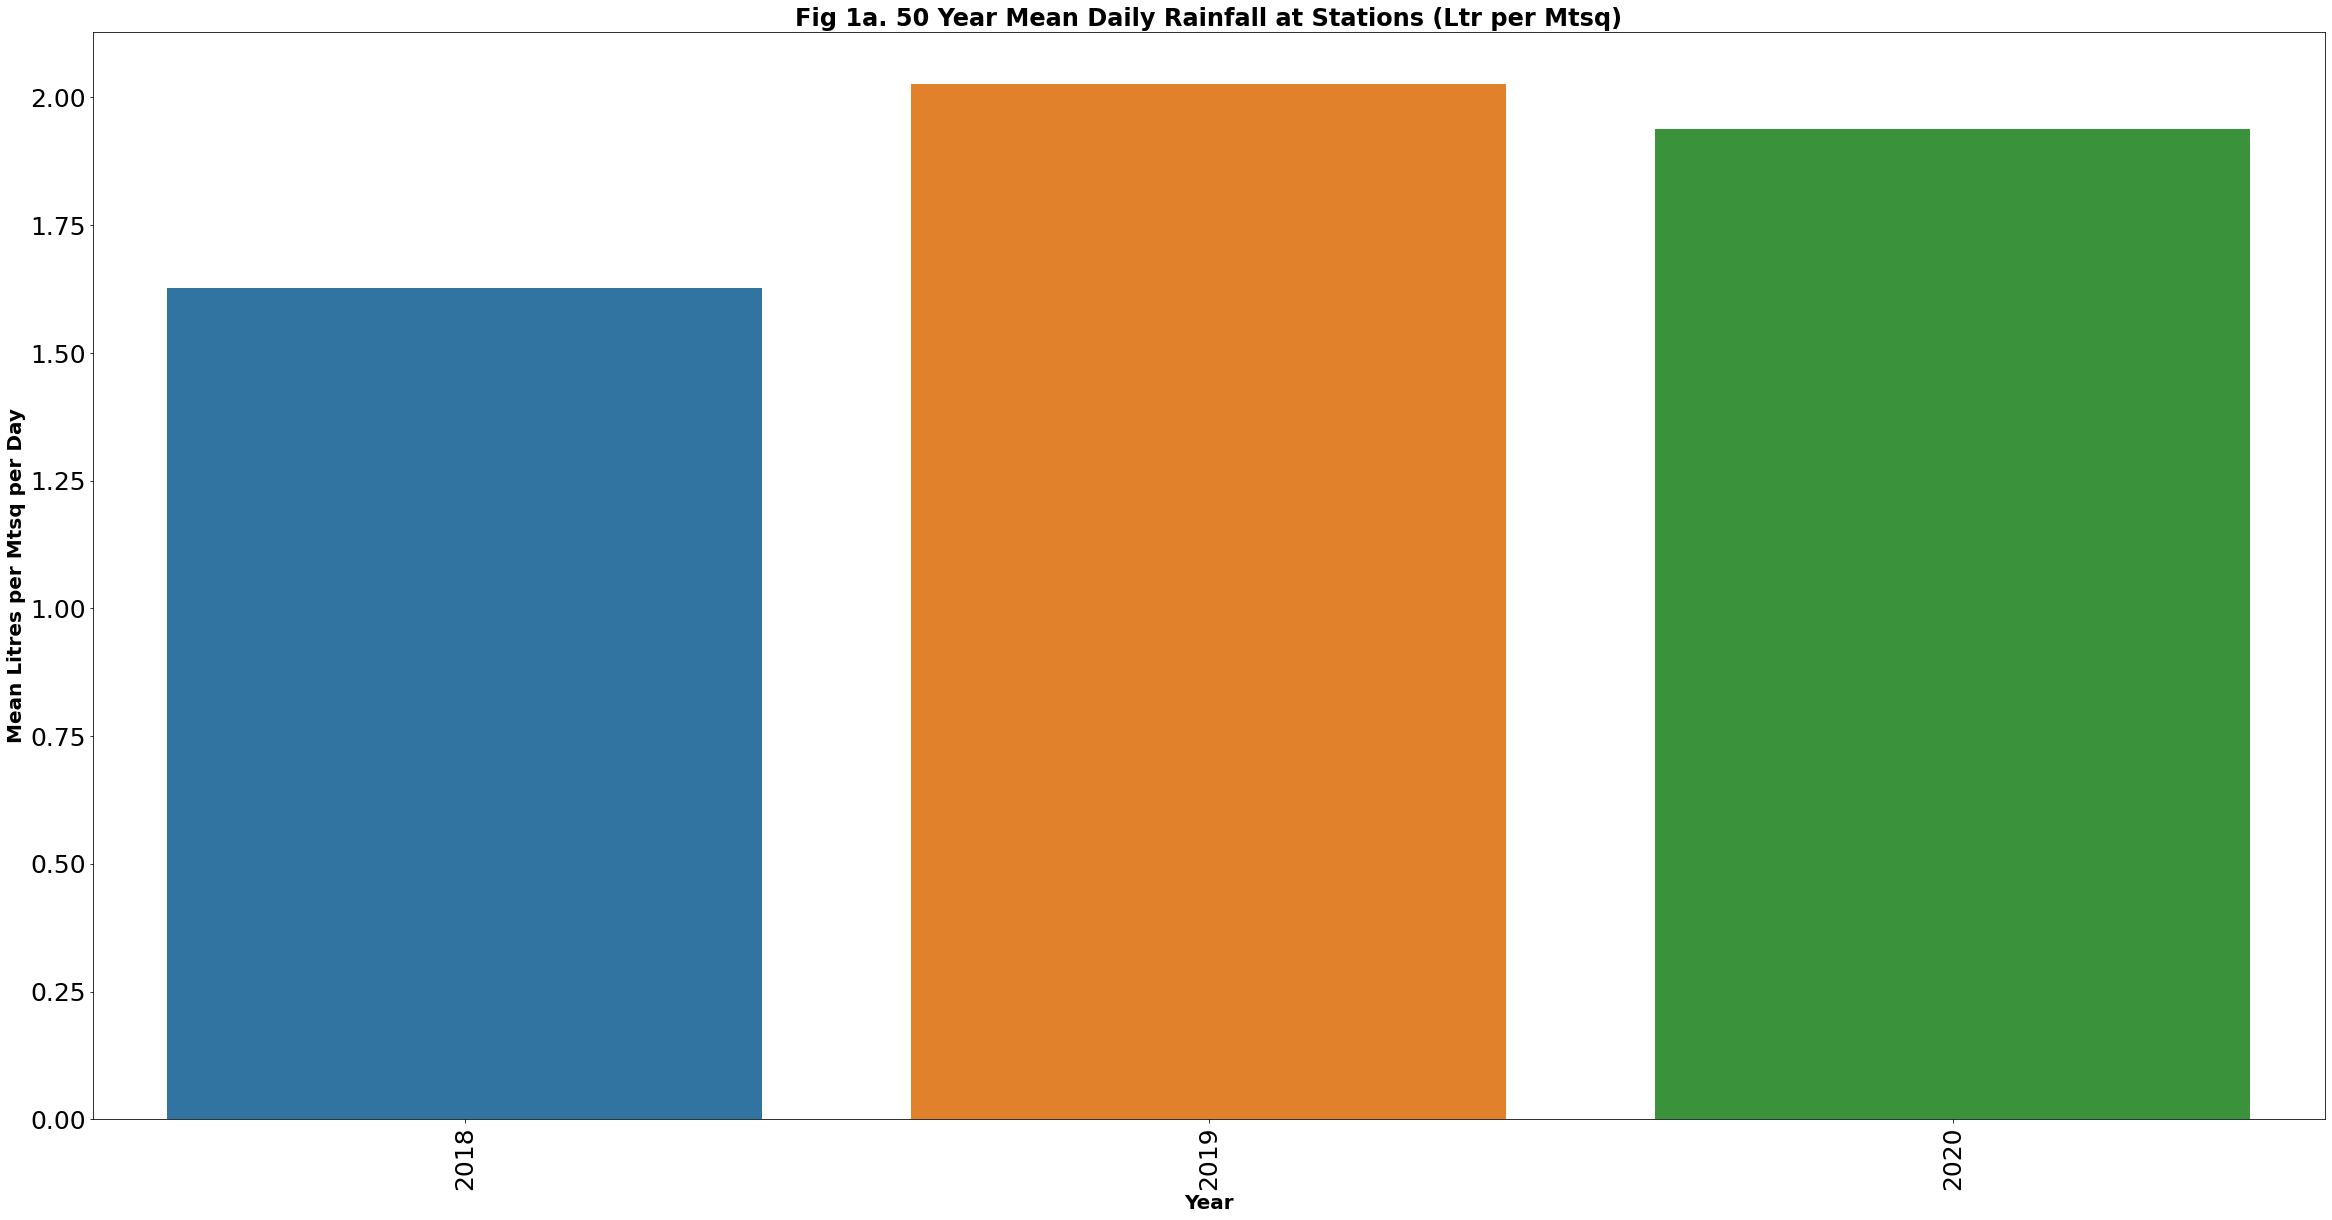

In [25]:
# Lets first look at the last 50 year trends for mean  rain across all stations 

# group df by year and get the mean across all stations that year
df_50Tmean = pd_50yrs.groupby(['YEAR'])['RSK'].mean().reset_index()


# Plot the mean rain across all stations by year and assess any trends to be observed


plt.figure(figsize=(40, 20))
sns.barplot(data=df_50Tmean, x='YEAR', y='RSK', linewidth=3)
plt.title('Fig 1a. 50 Year Mean Daily Rainfall at Stations (Ltr per Mtsq)', fontsize=24, fontweight='bold')
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('Year', fontsize=20, fontweight='bold')
plt.ylabel('Mean Litres per Mtsq per Day', fontsize=20, fontweight='bold')

# Save the figures for later use:
os.chdir(output)
plt.savefig('Fig 1a. 50 Year Mean Daily Rainfall at Stations (Ltr per Mtsq).jpg', bbox_inches='tight');

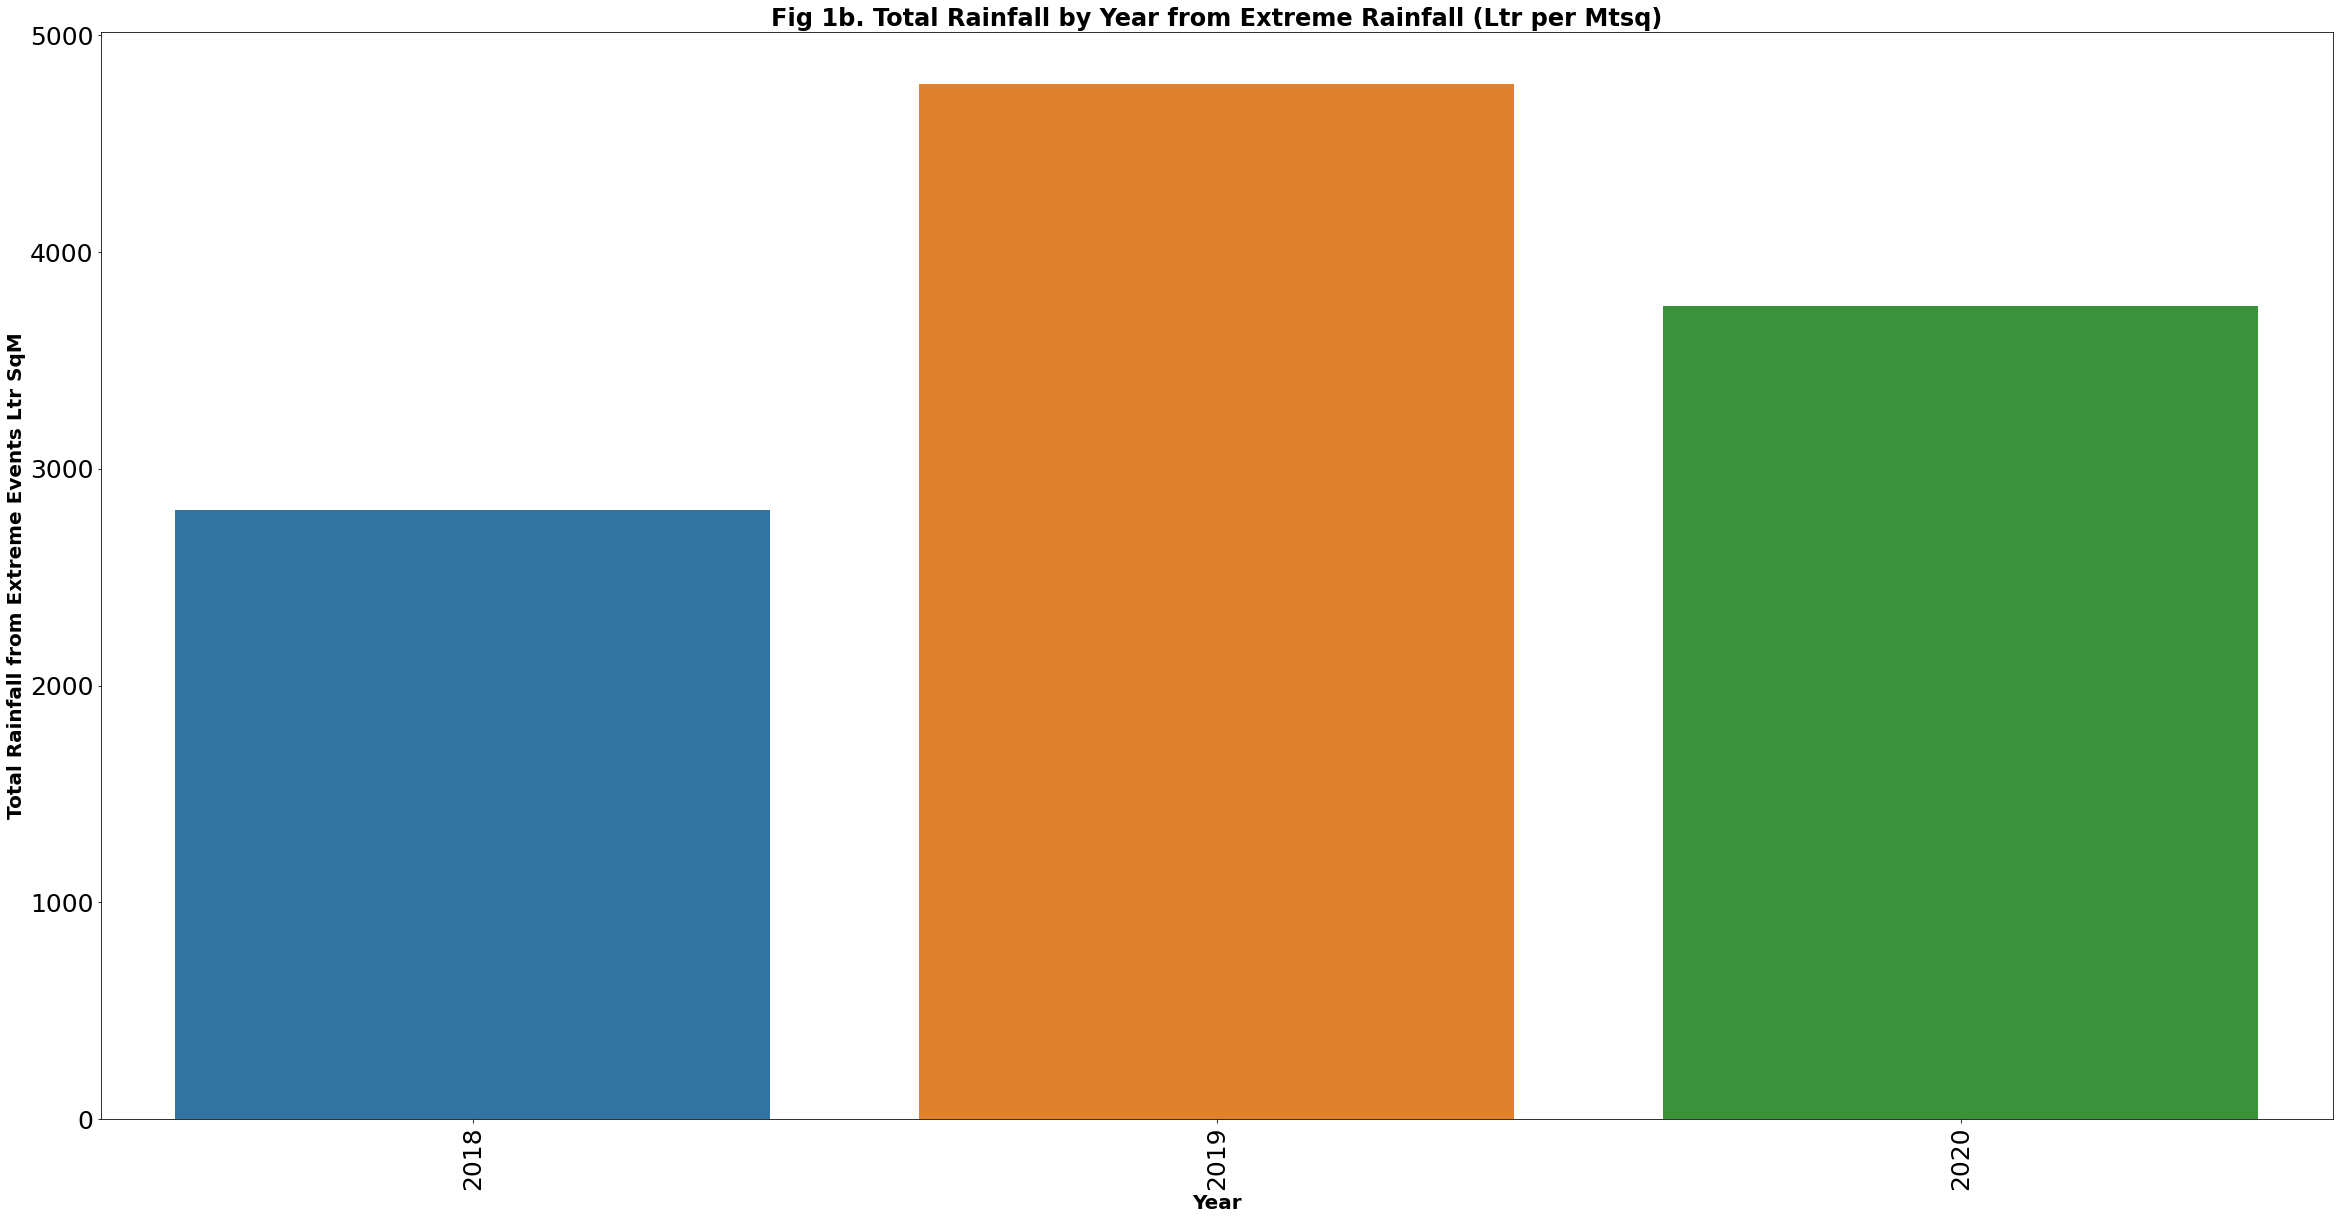

In [26]:
# For this 50 year period lets look at annual total rainfall from Extreme Events  

# group df by year and get the total across all stations that year [also did for mean and same trend was evident]

df_50Tpeak = pd_50yrs.groupby(['YEAR'])['PEAK'].sum().reset_index()

# Plot the number of observations to see if any trends to be observed
# Passing the entire dataset in long-form mode will aggregate over repeated values (each year),
# to show the mean and 95% confidence interval:

plt.figure(figsize=(40, 20))
sns.barplot(data=df_50Tpeak, x='YEAR', y='PEAK', linewidth=3)
plt.title('Fig 1b. Total Rainfall by Year from Extreme Rainfall (Ltr per Mtsq)', fontsize=24, fontweight='bold')
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('Year', fontsize=20, fontweight='bold')
plt.ylabel('Total Rainfall from Extreme Events Ltr SqM', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 1b. Total Rainfall by Year from Extreme Rainfall.jpg', bbox_inches='tight');

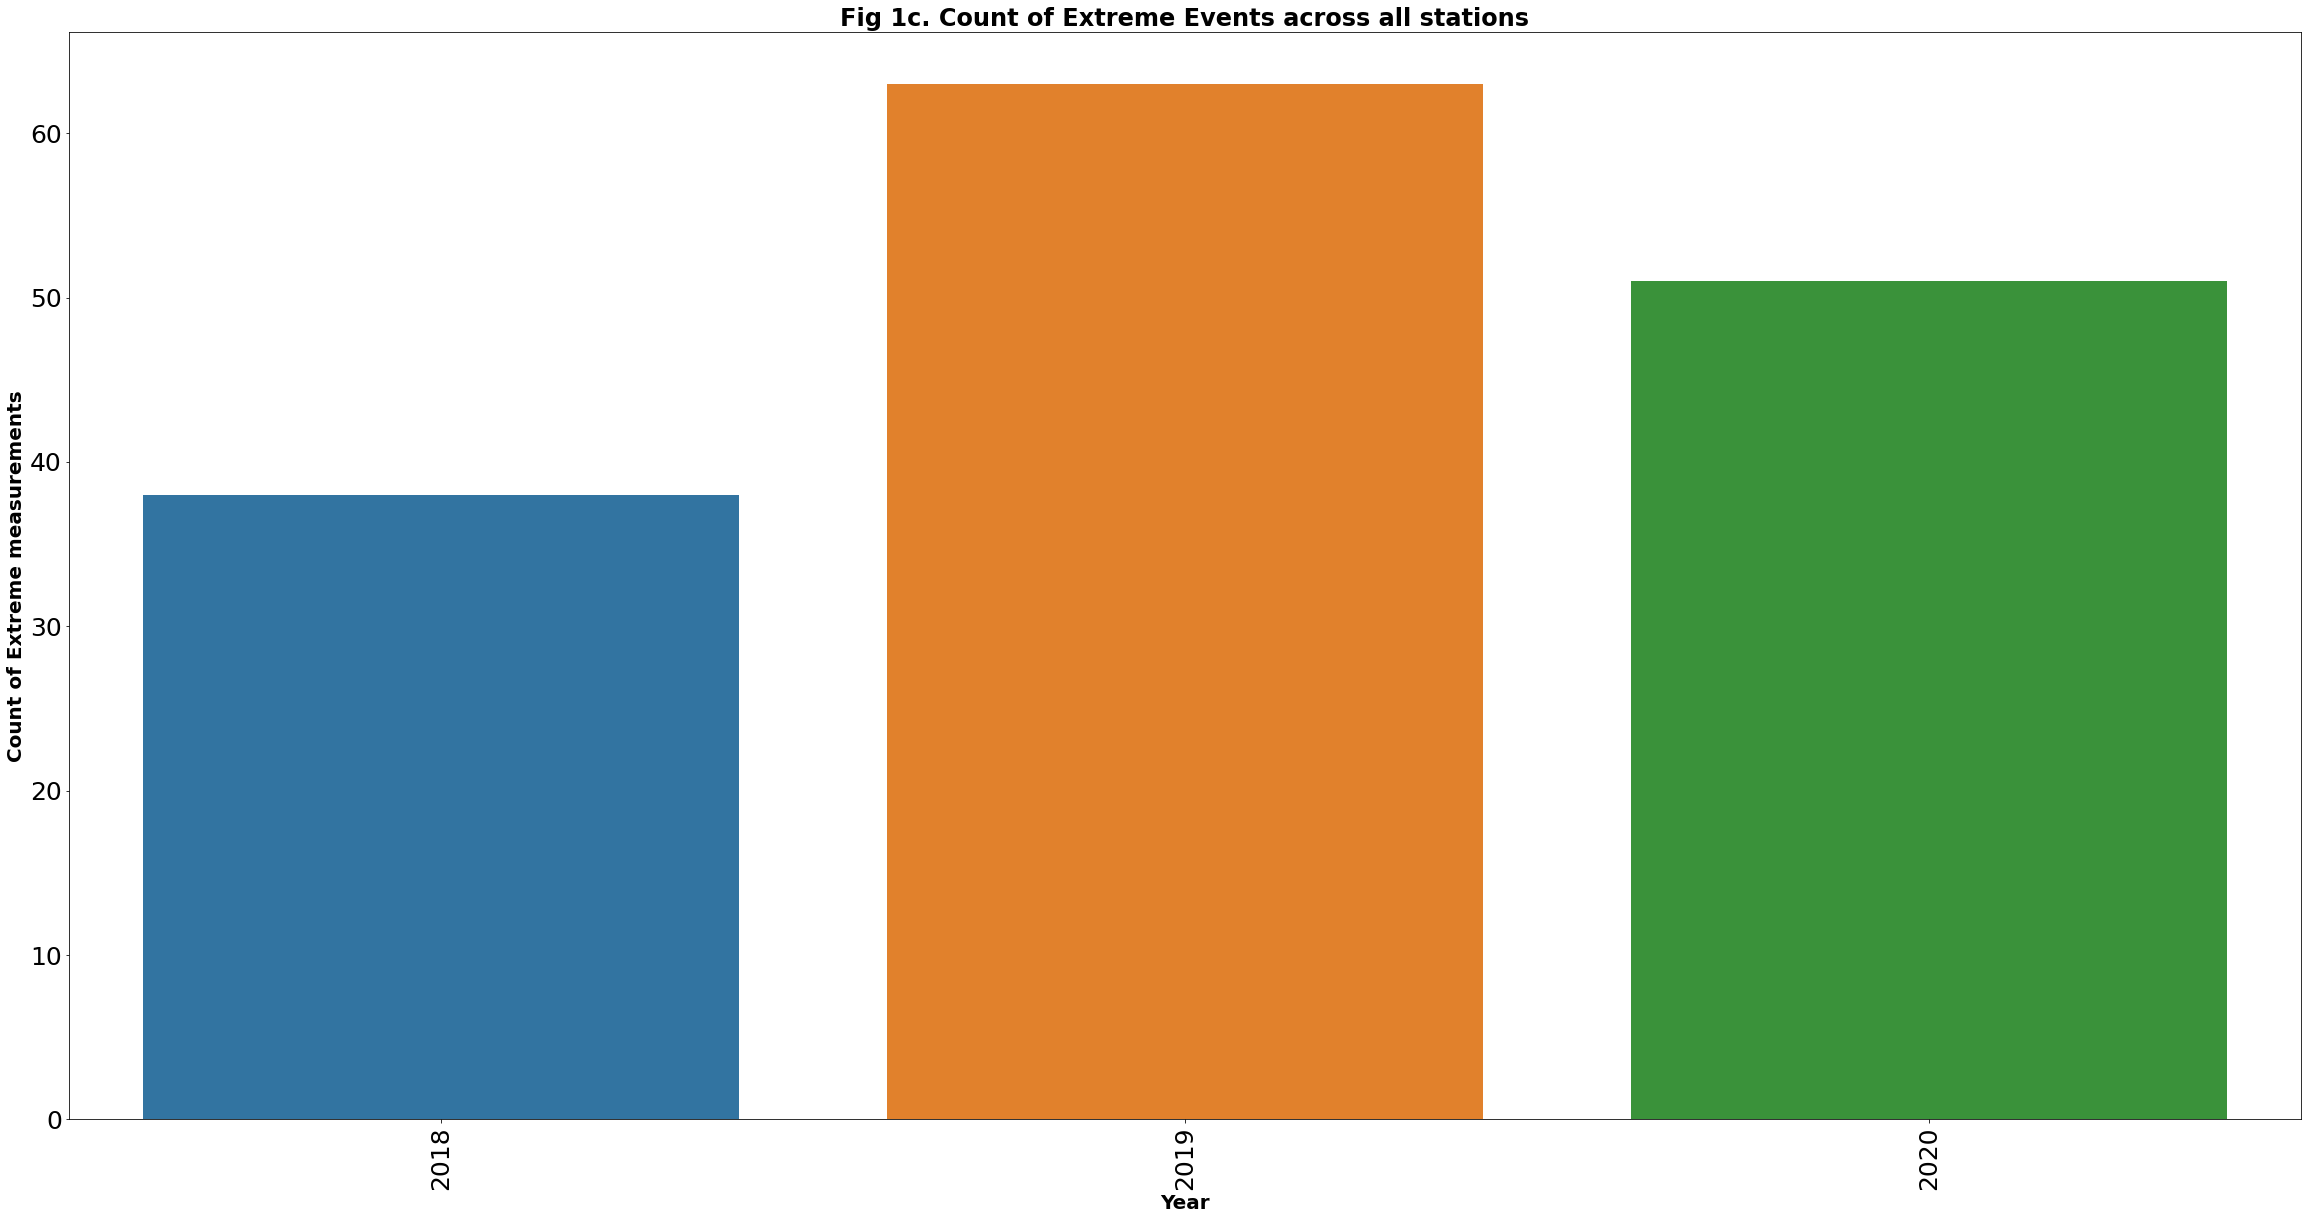

In [27]:

# For this 50 year period lets look at the number of Extreme Events in any year 

df_50Extreem = pd_50yrs[pd_50yrs.RATING == 'Extreme'].copy()
# group df by year and get the mean across all stations that year


df_50Ecount = df_50Extreem.groupby(['YEAR'])['RATING'].count().reset_index()

# Plot the number of observations to see if any trends to be observed
# Passing the entire dataset in long-form mode will aggregate over repeated values (each year),
# to show the mean and 95% confidence interval:

plt.figure(figsize=(40, 20))
sns.barplot(data=df_50Ecount, x='YEAR', y='RATING', linewidth=3)
plt.title('Fig 1c. Count of Extreme Events across all stations', fontsize=24, fontweight='bold')
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('Year', fontsize=20, fontweight='bold')
plt.ylabel('Count of Extreme measurements', fontsize=20, fontweight='bold')

# Save the figures for later use:
plt.savefig('Fig 1c. Count of Extreme Events across all stations.jpg', bbox_inches='tight');

In [28]:
# If required store the data from these graphs to seperate files 

df_50Tmean.to_csv('df_50Tmean.csv')
df_50Tpeak.to_csv('df_50Tpeak.csv')
df_50Ecount.to_csv('df_50Ecount.csv')

#### 5.1.2. Further assess trends for the 5 year focus period ####

In [29]:
# We will now focus in on the last 6 years as this is the range we are using for our sales data.
# The intent here is to assess any seasonal trends in this rainfall data. 
# Lets remind ourselves of the dataset

pd_6yrs

,Unnamed: 0,STATIONS_ID,MESS_DATUM,RSK,YEAR,MONTH,WEEK,YEAR-MONTH,RATING,PEAK
0,0,2290,2018-01-01,0.0,2018,1,1,2018-01,Normal,0.0
1,1,2290,2018-01-02,1.2,2018,1,1,2018-01,Normal,0.0
2,2,2290,2018-01-03,10.4,2018,1,1,2018-01,Normal,0.0
3,3,2290,2018-01-04,18.5,2018,1,1,2018-01,Normal,0.0
4,4,2290,2018-01-05,0.0,2018,1,1,2018-01,Normal,0.0
...,...,...,...,...,...,...,...,...,...,...
537279,537279,19172,2020-12-27,3.1,2020,12,52,2020-12,Normal,0.0
537280,537280,19172,2020-12-28,6.8,2020,12,53,2020-12,Normal,0.0
537281,537281,19172,2020-12-29,2.4,2020,12,53,2020-12,Normal,0.0
537282,537282,19172,2020-12-30,2.4,2020,12,53,2020-12,Normal,0.0


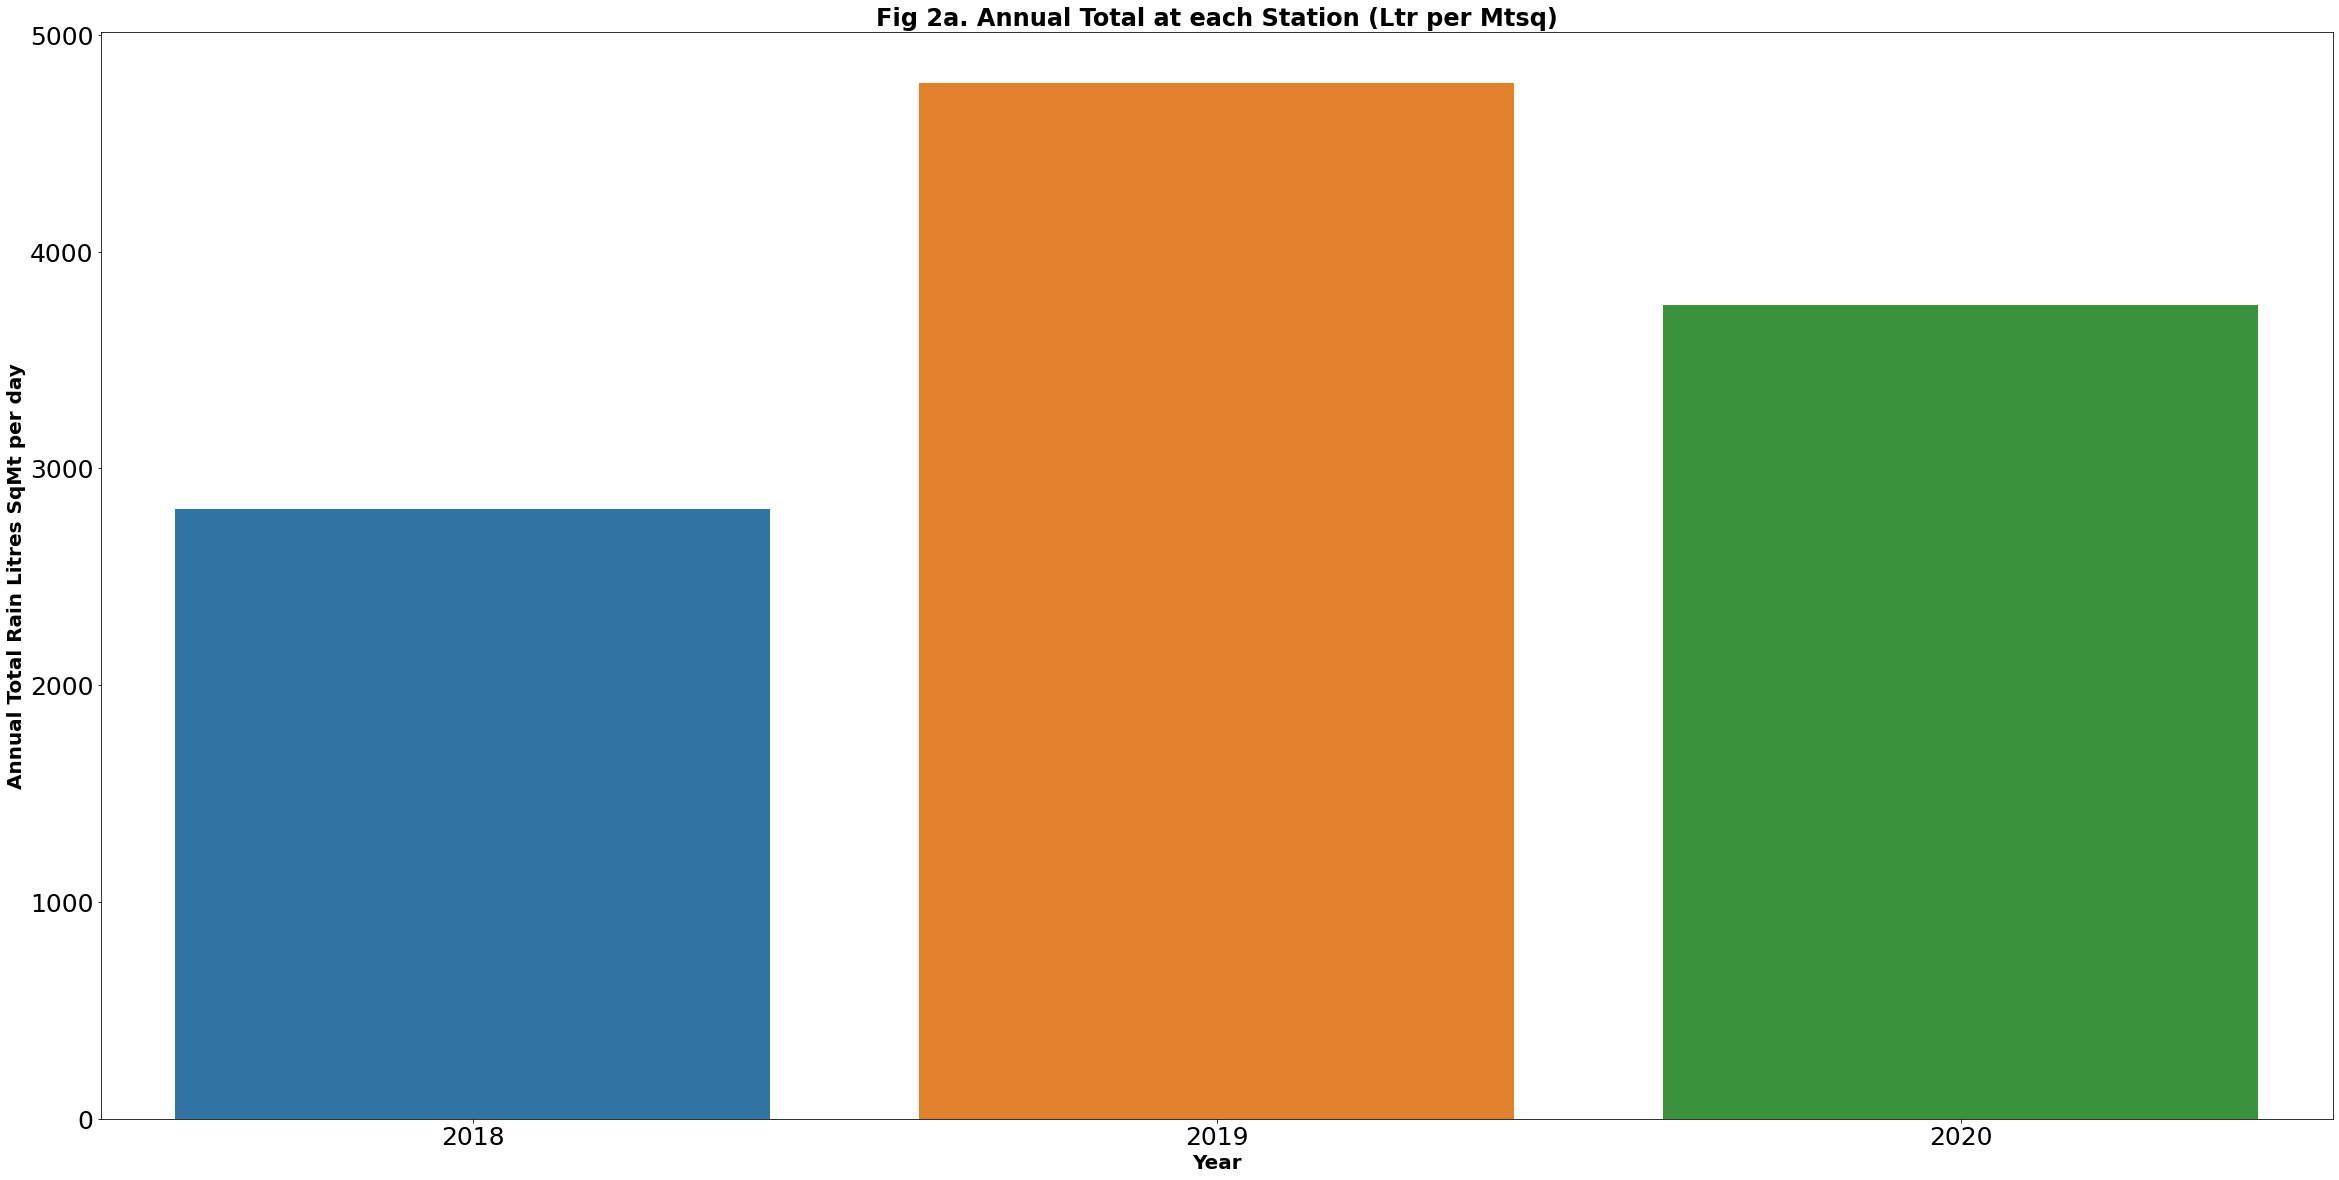

In [30]:
# Take a look at the data to get an overall view of total rainfall by year 


# group df by year and count days where RSK is recorded
df_annual = pd_6yrs.groupby(['YEAR'])['PEAK'].sum().reset_index()


# Plot the number of observations to see if any trends to be observed
# Passing the entire dataset in long-form mode will aggregate over repeated values (each year),
# to show the mean and 95% confidence interval:

plt.figure(figsize=(40, 20))
sns.barplot(data=df_annual, x='YEAR', y='PEAK', linewidth=3)
plt.title('Fig 2a. Annual Total at each Station (Ltr per Mtsq)', fontsize=24, fontweight='bold')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Year', fontsize=20, fontweight='bold')
plt.ylabel('Annual Total Rain Litres SqMt per day', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 2a. Annual Total at each Station.jpg', bbox_inches='tight');

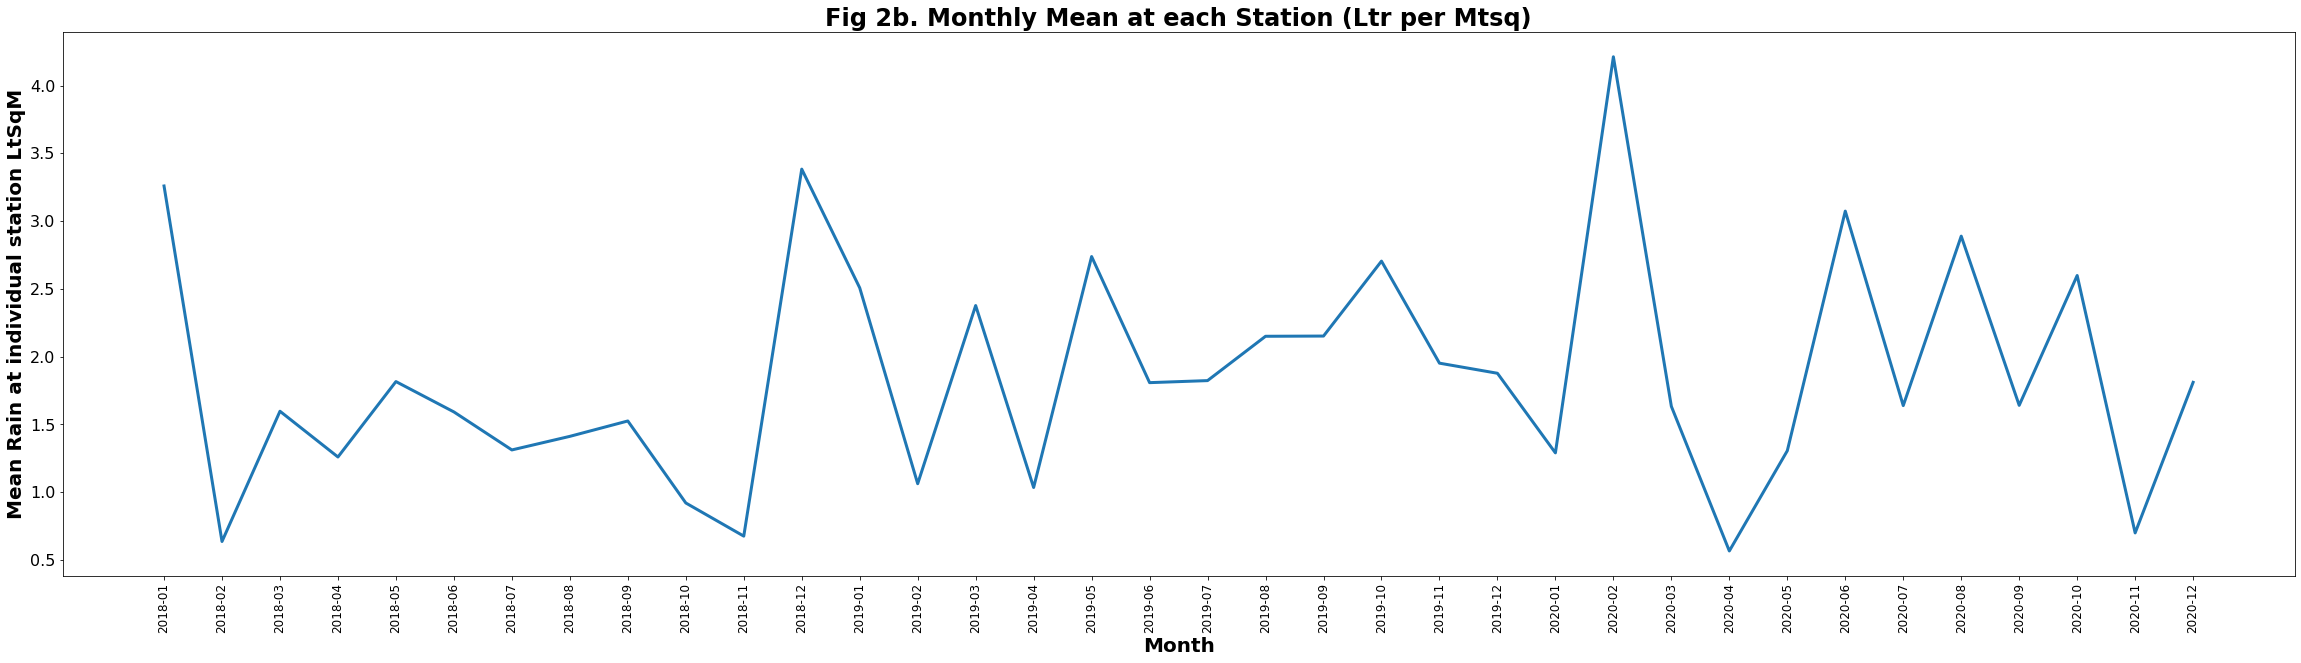

In [31]:
# Take a look at the data to get an overall view of mean daily rainfall at each station by month 
# This is the daily mean reading in on month periods over the years. 

# group df by year and count days where RSK is recorded
df_annual = pd_6yrs.groupby(['YEAR-MONTH'])['RSK'].mean().reset_index()


# Plot the number of observations to see if any trends to be observed
# Passing the entire dataset in long-form mode will aggregate over repeated values (each year),
# to show the mean and 95% confidence interval:

plt.figure(figsize=(40, 10))
sns.lineplot(data=df_annual, x='YEAR-MONTH', y='RSK', linewidth=3)
plt.title('Fig 2b. Monthly Mean at each Station (Ltr per Mtsq)', fontsize=24, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=16)
plt.xlabel('Month', fontsize=20, fontweight='bold')
plt.ylabel('Mean Rain at individual station LtSqM', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 2b. Monthly Mean at each Station.jpg', bbox_inches='tight');



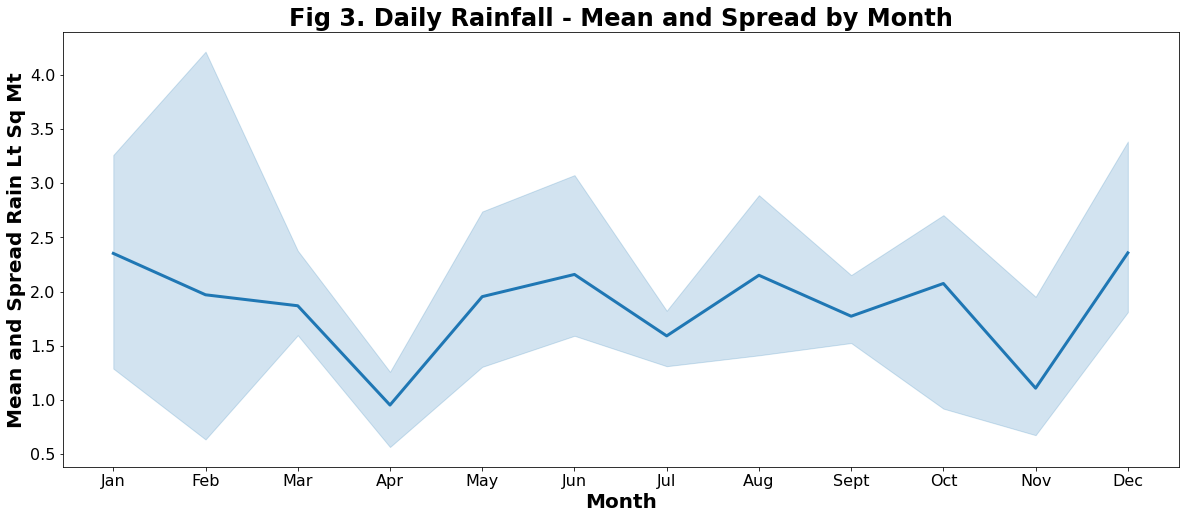

In [32]:
# As we look to see if there is any seasonality over the year to help our forecsting
# lets take a look at the data to get an overall view of average daily rainfall at each station by month 
# This is the daily mean reading in on month periods. 

# group df by year and count days where RSK is recorded
df_count = pd_6yrs.groupby(['YEAR','MONTH'])['RSK'].mean().reset_index()

#setup some axis title variables
mm=[1,2,3,4,5,6,7,8,9,10,11,12]
mm0=[0,1,2,3,4,5,6,7,8,9,10,11]
mmm=['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun','Jul', 'Aug', 'Sept','Oct', 'Nov', 'Dec']

# Plot the number of observations to see if any trends to be observed
# Passing the entire dataset in long-form mode will aggregate over repeated values (each year),
# to show the mean and 95% confidence interval:

plt.figure(figsize=(20, 8))
sns.lineplot(data=df_count, x='MONTH', y='RSK', linewidth=3)
plt.title('Fig 3. Daily Rainfall - Mean and Spread by Month', fontsize=24, fontweight='bold')
plt.xticks(mm,mmm,fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Month', fontsize=20, fontweight='bold')
plt.ylabel('Mean and Spread Rain Lt Sq Mt', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 3. Daily Rainfall - Mean and Spread by Month.jpg', bbox_inches='tight');

# Looks like big dip at the ens of each year, may be due to vacation over holiday period.  
# Will look deeper at daily data to verify.

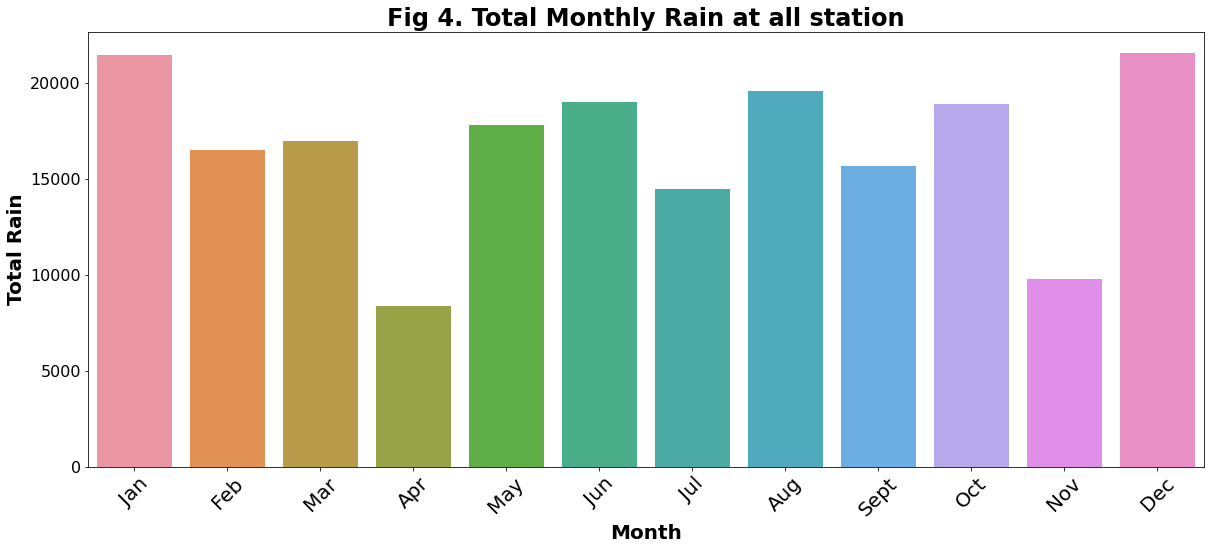

In [33]:
# Take a look at the data to get an overall view of average monthly total rain and annual variation by month
# This time just get the overall mean rainfall by month and present as bar graph
# This is the mean for all stations across germany

df_monthtotal = pd_6yrs.groupby('MONTH')['RSK'].sum().reset_index()

# As we have 5 years of data, divide by 5 to get average annual sum of all stations.
df_monthtotal['RSK'] = df_monthtotal['RSK']/5

# Plot the number of observations to see if any trends to be observed
plt.figure(figsize=(20, 8))
sns.barplot(data=df_monthtotal, x='MONTH', y='RSK', linewidth=3)
plt.title('Fig 4. Total Monthly Rain at all station', fontsize=24, fontweight='bold')
plt.xticks(mm0,mmm,fontsize=20, rotation=45)
plt.yticks(fontsize=16),
plt.xlabel('Month', fontsize=20, fontweight='bold')
plt.ylabel('Total Rain', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 4. Total Monthly Rain at all station by YYMMGroup.jpg', bbox_inches='tight');

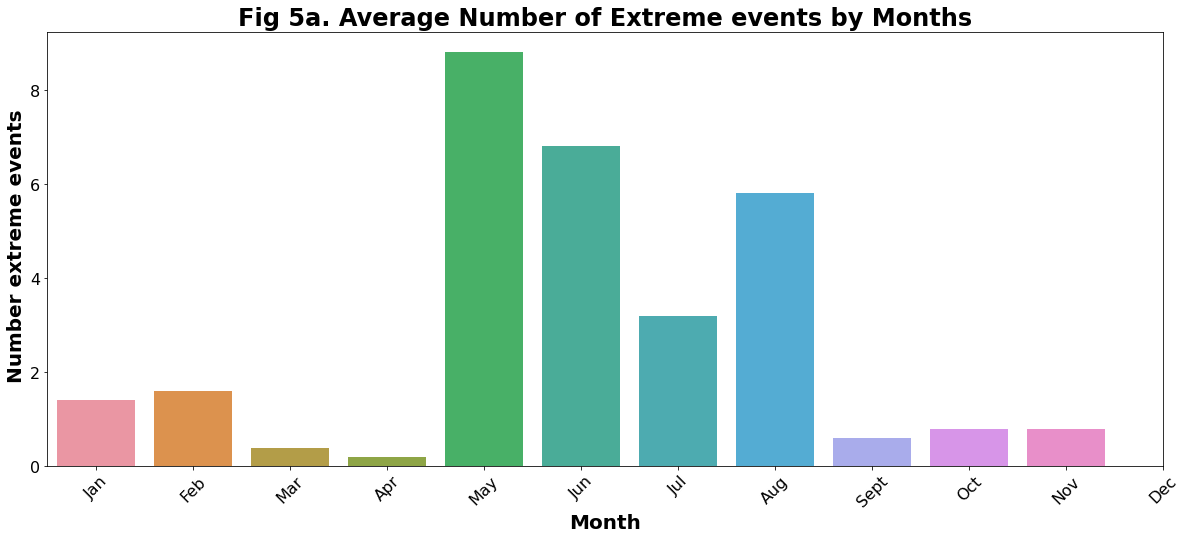

In [34]:
# This section looks a 'Peak' rain events only and summarizes the number of extreme events 


# For this 6 year period lets look at the number of Extreme Events in any year 

df_6Extreem = pd_6yrs[pd_6yrs.RATING == 'Extreme'].copy()
# group df by year and get the mean across all stations that year

df_CntExt = df_6Extreem.groupby('MONTH')['RATING'].count().reset_index()

# Convert this in an annual number
df_CntExt['RATING'] = df_CntExt['RATING']/5

# Plot the number of observations to see if any trends to be observed
plt.figure(figsize=(20, 8))
sns.barplot(data=df_CntExt, x='MONTH', y='RATING', linewidth=3)
plt.title('Fig 5a. Average Number of Extreme events by Months', fontsize=24, fontweight='bold')
plt.xticks(mm0,mmm,fontsize=16, rotation=45)
plt.yticks(fontsize=16),
plt.xlabel('Month', fontsize=20, fontweight='bold')
plt.ylabel(' Number extreme events', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 5a. Average extreme events by Months.jpg', bbox_inches='tight');

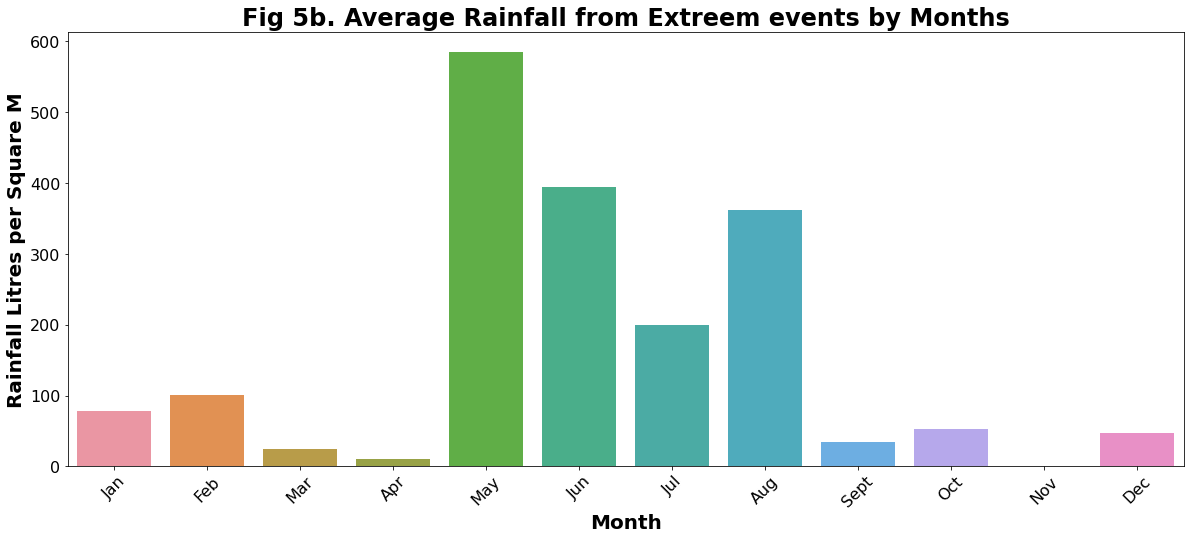

In [35]:
# This section looks a 'Peak' rain events only and summarizes total rain for all stations during these events
# in one month periods for all stations.

df_extreem = pd_6yrs.groupby('MONTH')['PEAK'].sum().reset_index()

# Convert this in an annual number
df_extreem['PEAK'] = df_extreem['PEAK']/6

# Plot the number of observations to see if any trends to be observed
plt.figure(figsize=(20, 8))
sns.barplot(data=df_extreem, x='MONTH', y='PEAK', linewidth=3)
plt.title('Fig 5b. Average Rainfall from Extreem events by Months', fontsize=24, fontweight='bold')
plt.xticks(mm0,mmm,fontsize=16, rotation=45)
plt.yticks(fontsize=16),
plt.xlabel('Month', fontsize=20, fontweight='bold')
plt.ylabel('Rainfall Litres per Square M', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 5b. Average PEAK Monthly Rain at all station.jpg', bbox_inches='tight');

#### 5.1.3. Summary 6 Year Peak Event Analysis ###

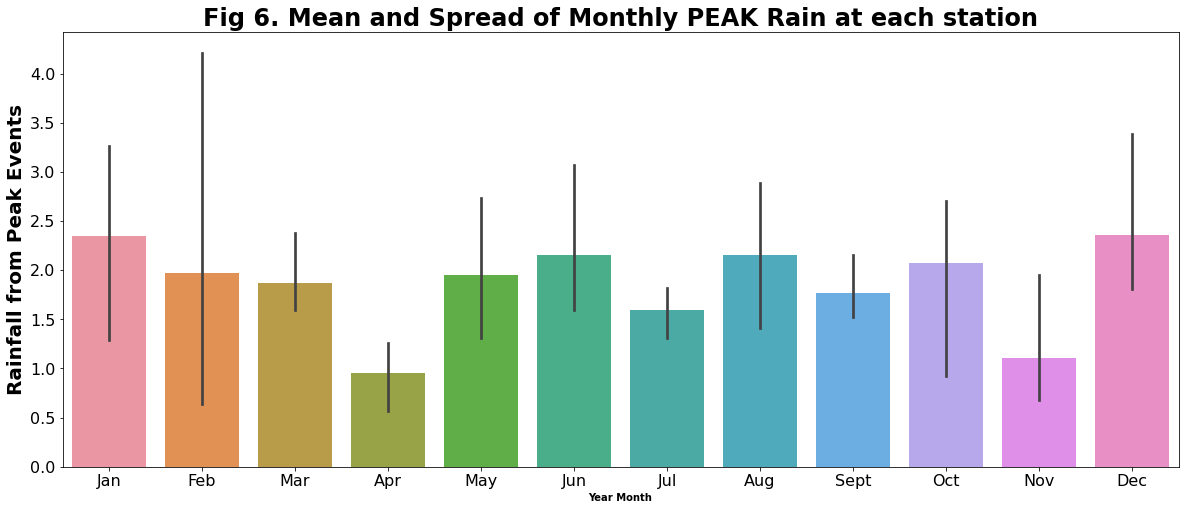

In [36]:
df_Mean = pd_6yrs.groupby(['YEAR','MONTH'])['RSK'].agg(['mean','median','std']).reset_index().copy()


# Plot the number of observations to see if any trends to be observed
plt.figure(figsize=(20, 8))
sns.barplot(data=df_Mean, x='MONTH', y='mean', linewidth=3)
plt.title('Fig 6. Mean and Spread of Monthly PEAK Rain at each station', fontsize=24, fontweight='bold')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun','Jul', 'Aug', 'Sept','Oct', 'Nov', 'Dec'],fontsize=16)
plt.yticks(fontsize=16),
plt.xlabel('Year Month', fontsize=10, fontweight='bold')
plt.ylabel('Rainfall from Peak Events', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 6. Mean and Spread of Monthly PEAK Rain at each station.jpg', bbox_inches='tight');

### 5.2. Sales Data Analysis ###

#### 5.2.1. Overview of sales ####

Figure 7. below is showing the trend of unit sales by month over the full dataset.  Overall the data looks ok, a general trend of increase over 2020 and 2021 is apparent which is reflected in sales revenue.  As the dataset only goes to the 1st week of Dec 2021 and we only have weather data for up to 2020 anyhow we will be excluding this year so no impact.

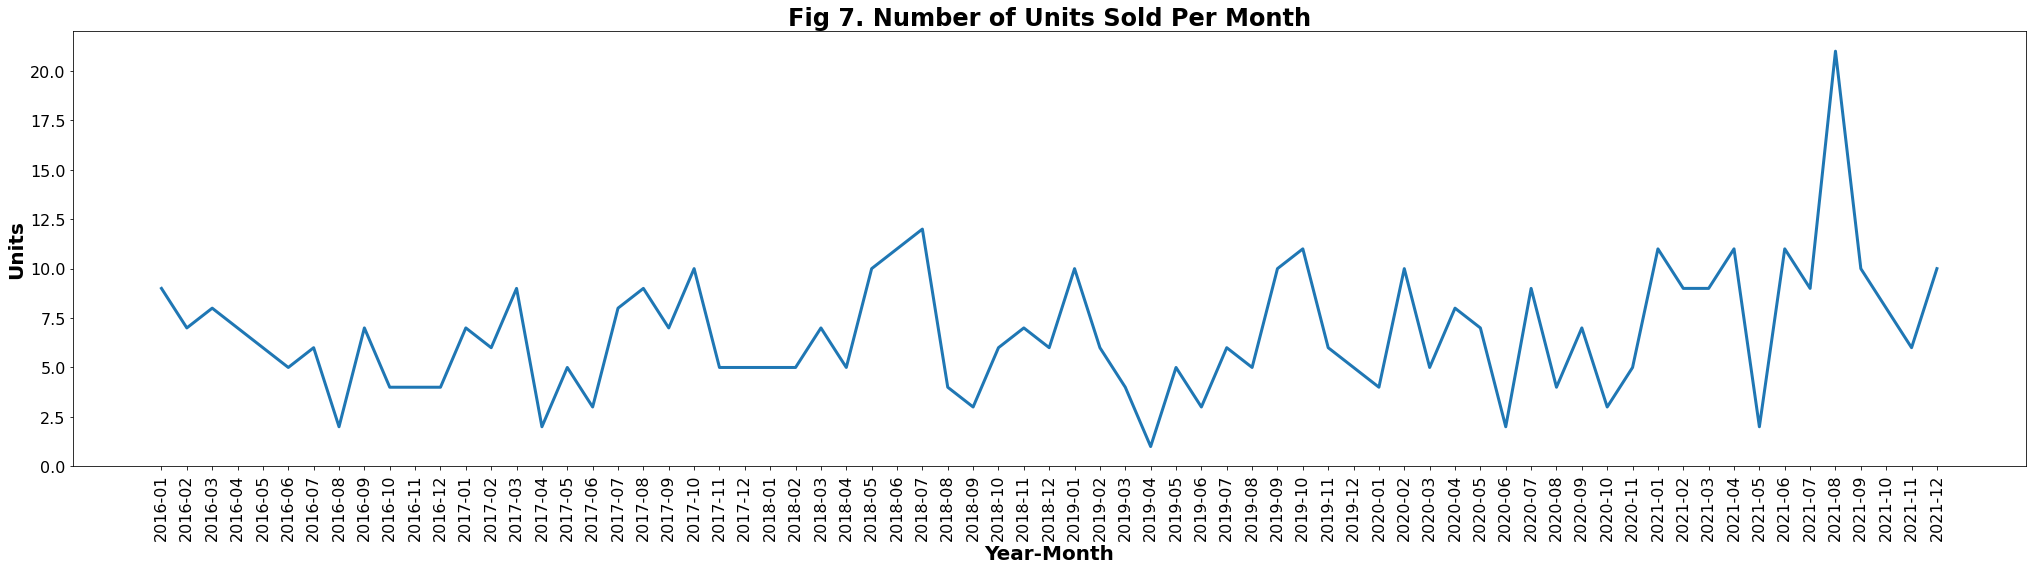

In [37]:
# lets start to look at the data and see how it looks for all sales

# Data shows about 9000 units per month with a slight trend to higher volumes in 2021

# Note 2021 data set did not contain all data for 2021-12 and hence is an outlayer, we will not use 2021 so no issue.

df_YYMM = df_merge.groupby('YYYY-MM invoiced')['INV.QTY'].sum().reset_index().copy()

# Plot the number of pumps sold by month 
plt.figure(figsize=(35, 8))

sns.lineplot(data=df_YYMM, x='YYYY-MM invoiced', y='INV.QTY', linewidth=3)

plt.title('Fig 7. Number of Units Sold Per Month', fontsize=24, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.xlabel('Year-Month', fontsize=20, fontweight='bold')
plt.ylabel('Units', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 7. Sales YYYY-MM.jpg', bbox_inches='tight');

#### 5.2.2. Overview of sales by month ####
Figure 8. below shows the mean sales by month and the 95% confidence level of qty sold by month over the six years.  Over the years business looks relatively stable with the largest variance in the months Dec, June and July.  

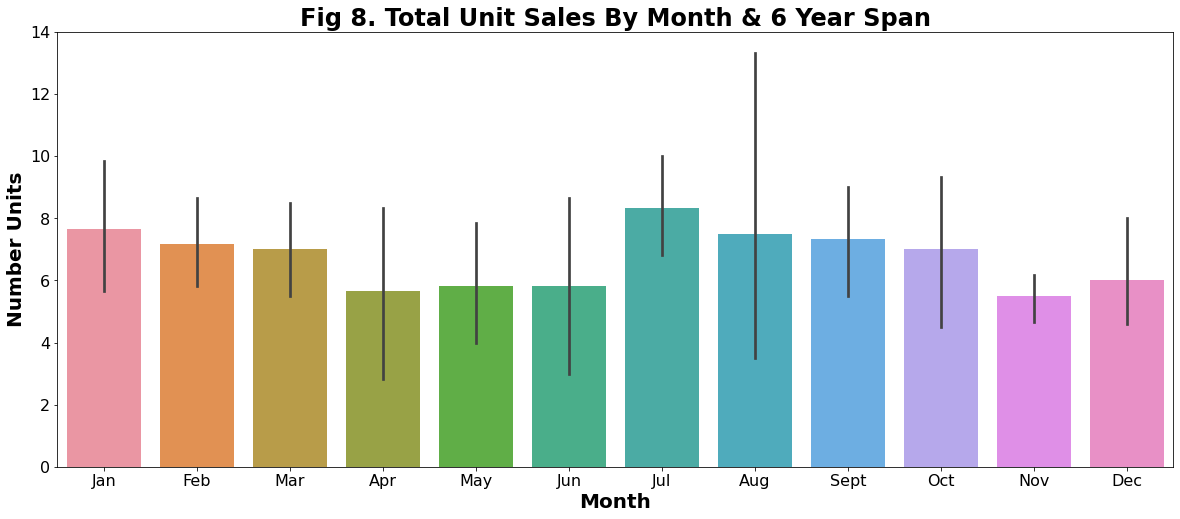

In [38]:
# Lets plot that data for the total by month over the years.

# Take a quick look at the number of pumps by Year and Month 
df_MM = df_merge.groupby(['Year','Month'])['INV.QTY'].sum().reset_index().copy()

# Lets plot that and convert the month number to month names
plt.figure(figsize=(20, 8))
sns.barplot(data=df_MM, x='Month', y='INV.QTY', linewidth=3)
plt.title('Fig 8. Total Unit Sales By Month & 6 Year Span', fontsize=24, fontweight='bold')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun','Jul', 'Aug', 'Sept','Oct', 'Nov', 'Dec'],fontsize=16)
plt.yticks(fontsize=16),
plt.xlabel('Month', fontsize=20, fontweight='bold')
plt.ylabel('Number Units', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 8. SalesMonthAvg.jpg', bbox_inches='tight'); 

#### 5.2.3. Reduce the sales data to DeWatering Products Only ####
In this section we will reduce the analysis to DeWatering products only.  In addition we will look at the product types in ths range and chnage the products names to be Product 1-8.  Figure 9. below shows the mean sales by month and the 95% confidence level of qty sold by month over the six years. Looking at Dewatering it is seen that June has an very high variance year over year.

In [39]:
# We want to now just start to focus on the Dewatering business only and look at trends for that
# Create a new Dataframe to slice this information and save the file for later use.
# We also need to remove 2021 data at this point as its not complete and not required for the analysis
# Drop negative values in the dataframe as these are sales credits and will distort the data

df_merge = df_merge[(df_merge.Family == 'Dewatering pumps')].copy()
df_merge = df_merge[(df_merge.Year != 2021) ].copy()
df_merge = df_merge[(df_merge['INV.QTY']>0)].copy()
df_dwall = df_merge



In [40]:
#Check what unique product types that are in the dataset.

unq_product = df_dwall['Product'].unique()
unq_product


array(['0e. J12-44 / JS12-44 / JC34', '0h. XJ / XJC / XJS 50-110',
       '0g. XJ / XJS 25-40'], dtype=object)

In [41]:
# For the main dataframe we will just change the product names to be Product1-6
# Due to the / in the product names, this was given a Future warning on this, however, adding regex=Fasle fixed that

# Create a simple dictionary to use for the conversion process
Pr = {1: "Product1", 2: "Product2",3: "Product3",4: "Product4",5: "Product5",6: "Product6",7: "Product7",8: "Product8"}

# Complete the substitution using the dictionary 
# For a large qty of products it would be better to do this using a for loop but that was already demonstrated.

df_dwall['Product'] = df_dwall['Product'].str.replace('0i. J5 / P401',Pr[1], regex=False).copy()
df_dwall['Product'] = df_dwall['Product'].str.replace('0h. XJ / XJC / XJS 50-110',Pr[2], regex=False).copy()
df_dwall['Product'] = df_dwall['Product'].str.replace('0g. XJ / XJS 25-40',Pr[3], regex=False).copy()
df_dwall['Product'] = df_dwall['Product'].str.replace('0k. SP, PS, P, PX (PUMPEX discont.)',Pr[4], regex=False).copy()
df_dwall['Product'] = df_dwall['Product'].str.replace('0f. J 54-604 / JS 54-84',Pr[5], regex=False).copy()
df_dwall['Product'] = df_dwall['Product'].str.replace('0h. XJ 900',Pr[6], regex=False).copy()
df_dwall['Product'] = df_dwall['Product'].str.replace('0e. J12-44 / JS12-44 / JC34',Pr[7], regex=False).copy()
df_dwall['Product'] = df_dwall['Product'].str.replace('0j. SJX2-60 / SJ5-60 (WEIR MINERAL)',Pr[8], regex=False).copy()

df_dwall

,Product,actual GI date,YYYY-MM invoiced,[INV.WeekInvoiced],INV.QTY,Capacity,Country,Month,Year,Family
2,Product7,2016-01-14 00:00:00,2016-01,2016-02,1,684,DE,1,2016,Dewatering pumps
6,Product7,2016-02-24 00:00:00,2016-02,2016-08,1,708,DE,2,2016,Dewatering pumps
7,Product7,2016-02-02 00:00:00,2016-02,2016-05,3,2053,DE,2,2016,Dewatering pumps
9,Product2,2016-02-08 00:00:00,2016-02,2016-06,1,1192,NL,2,2016,Dewatering pumps
13,Product7,2016-03-07 00:00:00,2016-03,2016-10,2,1492,DE,3,2016,Dewatering pumps
...,...,...,...,...,...,...,...,...,...,...
256,Product7,2020-04-15 00:00:00,2020-04,2020-16,2,3116,Country,4,2020,Dewatering pumps
258,Product7,2020-05-15 00:00:00,2020-05,2020-20,1,559,Country,5,2020,Dewatering pumps
259,Product7,2020-04-02 00:00:00,2020-04,2020-14,1,610,Country,4,2020,Dewatering pumps
265,Product7,2020-05-08 00:00:00,2020-05,2020-19,2,1169,Country,5,2020,Dewatering pumps


In [42]:
#Check that i have changed all the product types to generic names.

unq_product = df_dwall['Product'].unique()
unq_product

array(['Product7', 'Product2', 'Product3'], dtype=object)

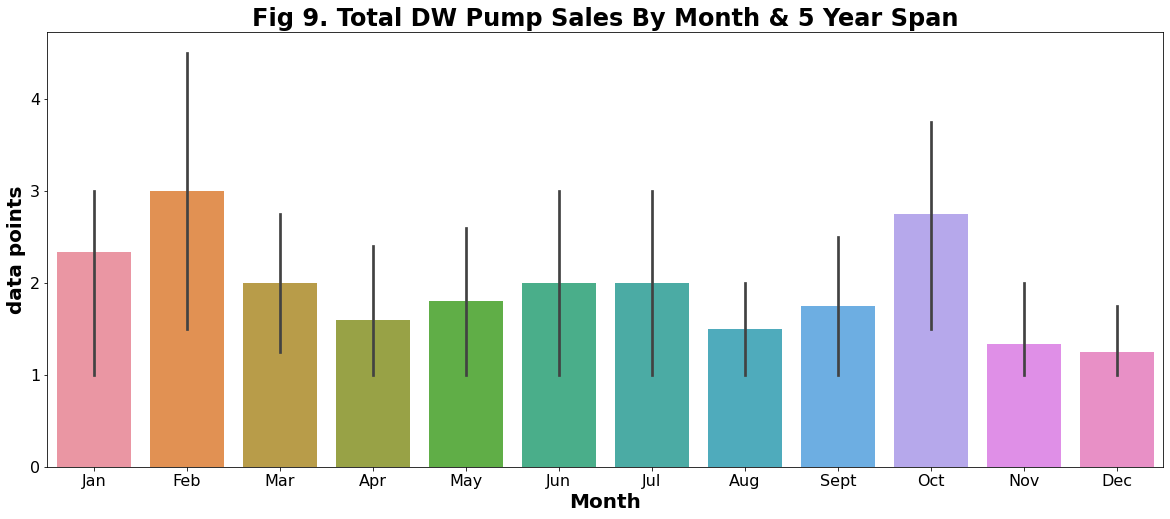

In [43]:
# Lets plot that data for the average and spread by month over the years.

# Take a quick look at the number of pumps by Year and Month 
df_dwallmm = df_dwall.groupby(['Year','Month'])['INV.QTY'].sum().reset_index().copy()

# Lets plot that and convert the month number to month names
plt.figure(figsize=(20, 8))
sns.barplot(data=df_dwallmm, x='Month', y='INV.QTY', linewidth=3)
plt.title('Fig 9. Total DW Pump Sales By Month & 5 Year Span', fontsize=24, fontweight='bold')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun','Jul', 'Aug', 'Sept','Oct', 'Nov', 'Dec'],fontsize=16)
plt.yticks(fontsize=16),
plt.xlabel('Month', fontsize=20, fontweight='bold')
plt.ylabel('data points', fontsize=20, fontweight='bold')


# Save the figures for later use:
 
plt.savefig('Fig 9. DWSpreadByMonth.jpg', bbox_inches='tight'); 

# This data shows the highest quantity sales in March.  
# June 2nd highest on average but has substantial variations making it the peak at times.

#### 5.2.4. Further Reduce the sales data to DeWatering Products for Germany Only ####
In this section we will reduce the analysis to DeWatering products only.  In addition we will look at the product types in ths range and chnage the products names to be Product 1-8.  Figure 10. below shows the mean sales by month and the 95% confidence level of qty sold by month over the six years for Germany only. General trends to overall global business loks similar however, appears there is more variation now in the summer months May to Aug.  Peak month is March preceeded by lower Jan and Feb which may be seasonal.

In [44]:
# Data set is currently all Dewatering business
# Now to focus on Germany only to compare to the rainfall data that is available for Germany

# It was noticed in this dataset that some of the countries are 2 characters and some are full name 
# We will need to ensure this is corrected - for the scope of this exercise we will only convert DE & Germany

df_dwall['Country'] = df_dwall['Country'].str.replace('DE','Germany').copy()

df_dwall = df_dwall[(df_dwall.Country == 'Germany')].copy()
df_dwall = df_dwall.drop(columns='actual GI date').copy()

df_dwGer = df_dwall

# We can now save the unsenstized data to a file for later use.
df_dwGer.to_csv('Dewatering Germany 2016 to 2020 Merged.csv')

df_dwGer


,Product,YYYY-MM invoiced,[INV.WeekInvoiced],INV.QTY,Capacity,Country,Month,Year,Family
2,Product7,2016-01,2016-02,1,684,Germany,1,2016,Dewatering pumps
6,Product7,2016-02,2016-08,1,708,Germany,2,2016,Dewatering pumps
7,Product7,2016-02,2016-05,3,2053,Germany,2,2016,Dewatering pumps
13,Product7,2016-03,2016-10,2,1492,Germany,3,2016,Dewatering pumps
25,Product7,2016-04,2016-17,1,684,Germany,4,2016,Dewatering pumps
27,Product7,2016-05,2016-20,1,716,Germany,5,2016,Dewatering pumps
30,Product7,2016-06,2016-22,1,735,Germany,6,2016,Dewatering pumps
40,Product7,2016-09,2016-38,2,1492,Germany,9,2016,Dewatering pumps
45,Product7,2016-09,2016-38,1,684,Germany,9,2016,Dewatering pumps
49,Product7,2016-10,2016-41,1,684,Germany,10,2016,Dewatering pumps


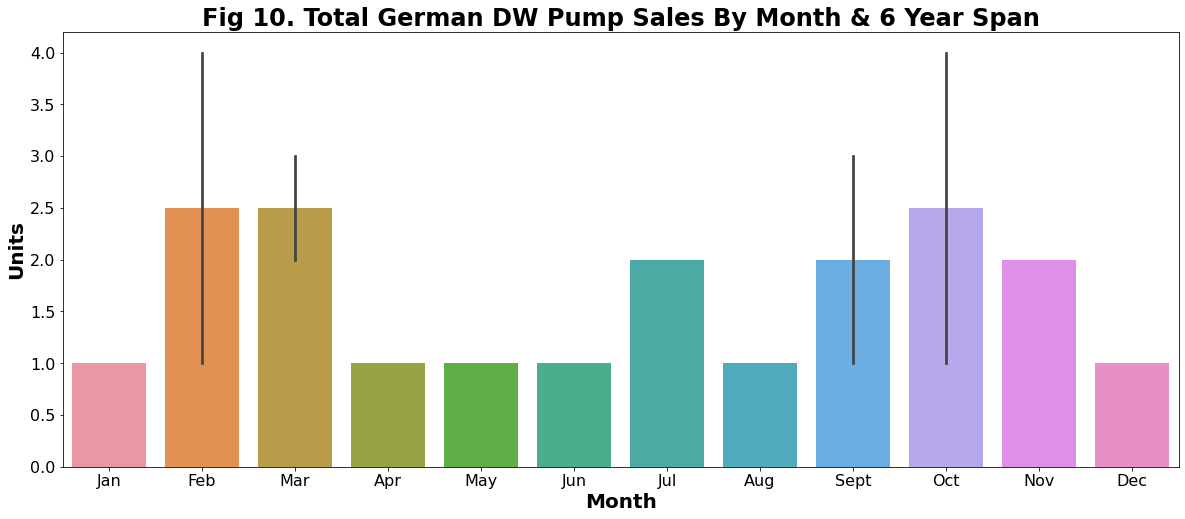

In [45]:
# Lets plot that data for the average and spread by month over the years.

# Take a quick look at the number of pumps by Year and Month 
df_dwGermm = df_dwGer.groupby(['Year','Month'])['INV.QTY'].sum().reset_index().copy()

# Lets plot that and convert the month number to month names
plt.figure(figsize=(20, 8))
sns.barplot(data=df_dwGermm, x='Month', y='INV.QTY', linewidth=3)
plt.title('Fig 10. Total German DW Pump Sales By Month & 6 Year Span', fontsize=24, fontweight='bold')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun','Jul', 'Aug', 'Sept','Oct', 'Nov', 'Dec'],fontsize=16)
plt.yticks(fontsize=16),
plt.xlabel('Month', fontsize=20, fontweight='bold')
plt.ylabel('Units', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 10. GerDWSpreadByMonth.jpg', bbox_inches='tight'); 

# This data shows the highest quantity sales in March.  July & Aug not as high on average but have substantial variations.

In [46]:
df_dwGer

,Product,YYYY-MM invoiced,[INV.WeekInvoiced],INV.QTY,Capacity,Country,Month,Year,Family
2,Product7,2016-01,2016-02,1,684,Germany,1,2016,Dewatering pumps
6,Product7,2016-02,2016-08,1,708,Germany,2,2016,Dewatering pumps
7,Product7,2016-02,2016-05,3,2053,Germany,2,2016,Dewatering pumps
13,Product7,2016-03,2016-10,2,1492,Germany,3,2016,Dewatering pumps
25,Product7,2016-04,2016-17,1,684,Germany,4,2016,Dewatering pumps
27,Product7,2016-05,2016-20,1,716,Germany,5,2016,Dewatering pumps
30,Product7,2016-06,2016-22,1,735,Germany,6,2016,Dewatering pumps
40,Product7,2016-09,2016-38,2,1492,Germany,9,2016,Dewatering pumps
45,Product7,2016-09,2016-38,1,684,Germany,9,2016,Dewatering pumps
49,Product7,2016-10,2016-41,1,684,Germany,10,2016,Dewatering pumps


###  5.3 Combine Weather & Sales Data Analysis ###
In this section we will combine the weather data with the sales data.

In [47]:
# Assign filename to variable: file
mergedfile = 'Dewatering Germany 2016 to 2020 Merged.csv'

# old variable - can be deleted.
#raindata = 'Dewatering Germany 2016 to 2020 Merged.csv'

fields = ['Product','YYYY-MM invoiced','[INV.WeekInvoiced]','INV.QTY','Capacity','Country','Month','Year','Family']

In [48]:
# I now want to focus in on the Dewatering business and start to compare to the rainfall date for Germany Only
# This file was already created to Read in the German Dewatering sales data file again 

df_dwGer = pd.read_csv(mergedfile, delimiter=',', usecols=fields)

# Rename the Year Month column 'YYYY-MM invoiced' from data to a standard 'YEAR-MONTH' name for both datasets

df_dwGer = df_dwGer.rename(columns={'YYYY-MM invoiced': 'YEAR-MONTH'})

# Group the data by YEAR-MONTH so we can compare to rain data for same format.

df_dwGermm = df_dwGer.groupby(['YEAR-MONTH'])[['INV.QTY','Capacity']].sum().reset_index().copy()

#Check the dataset, should have 60 records i.e. 5 years by 12 months.

df_dwGermm

,YEAR-MONTH,INV.QTY,Capacity
0,2016-01,1,684
1,2016-02,4,2761
2,2016-03,2,1492
3,2016-04,1,684
4,2016-05,1,716
5,2016-06,1,735
6,2016-09,3,2176
7,2016-10,1,684
8,2016-11,2,1909
9,2016-12,1,684


In [49]:
# I also want to include product cathegory to see if any correlation
df_dwGerPr = df_dwGer.groupby(['YEAR-MONTH','Product'])[['INV.QTY','Capacity']].sum().reset_index().copy()

df_dwGerPr

,YEAR-MONTH,Product,INV.QTY,Capacity
0,2016-01,Product7,1,684
1,2016-02,Product7,4,2761
2,2016-03,Product7,2,1492
3,2016-04,Product7,1,684
4,2016-05,Product7,1,716
5,2016-06,Product7,1,735
6,2016-09,Product7,3,2176
7,2016-10,Product7,1,684
8,2016-11,Product3,1,1225
9,2016-11,Product7,1,684


In [50]:
# This section can just use the previous DF for weather but just loading from saved file

# Read in the weather data file again and load as peak rain plot dataframe df_plotpr
weatherfile='Germany Weather 2016 to 2020.csv'

#pd_weather = pd.read_csv(file, parse_dates=['MESS_DATUM'], compression='zip')
df_plot = pd.read_csv(weatherfile)

df_plotpr = df_plot.groupby(['YEAR-MONTH'])[['RSK','PEAK']].sum().reset_index().copy()

#Check the dataset, should have 60 records i.e. 5 years by 12 months.
df_plotpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR-MONTH  36 non-null     object 
 1   RSK         36 non-null     float64
 2   PEAK        36 non-null     float64
dtypes: float64(2), object(1)
memory usage: 992.0+ bytes


In [51]:
#merge the two data sets into one dataframe

pd.combined = pd.merge(df_dwGermm, df_plotpr, on='YEAR-MONTH', how='outer').reset_index().copy()
         
pd.combined = pd.combined.drop(columns='index').copy()

pd.combined.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR-MONTH  55 non-null     object 
 1   INV.QTY     19 non-null     float64
 2   Capacity    19 non-null     float64
 3   RSK         36 non-null     float64
 4   PEAK        36 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.3+ KB


####  5.3.1. Look for corrolation across the Weather & Sales Data Analysis ####
In this section we will look for corrolation across the full data set. It can be seen there is good corrolation between capacity and units sold [INV QTY], this would be expected as the more units sold the more capacity is delivered.  Other than that there is no obvious corrolation to the weather dataset.  Note you will see a lot of sales around the low end of peak data.  This is due to the Zero's that are entered when a normal or heavy rain only is recorded.

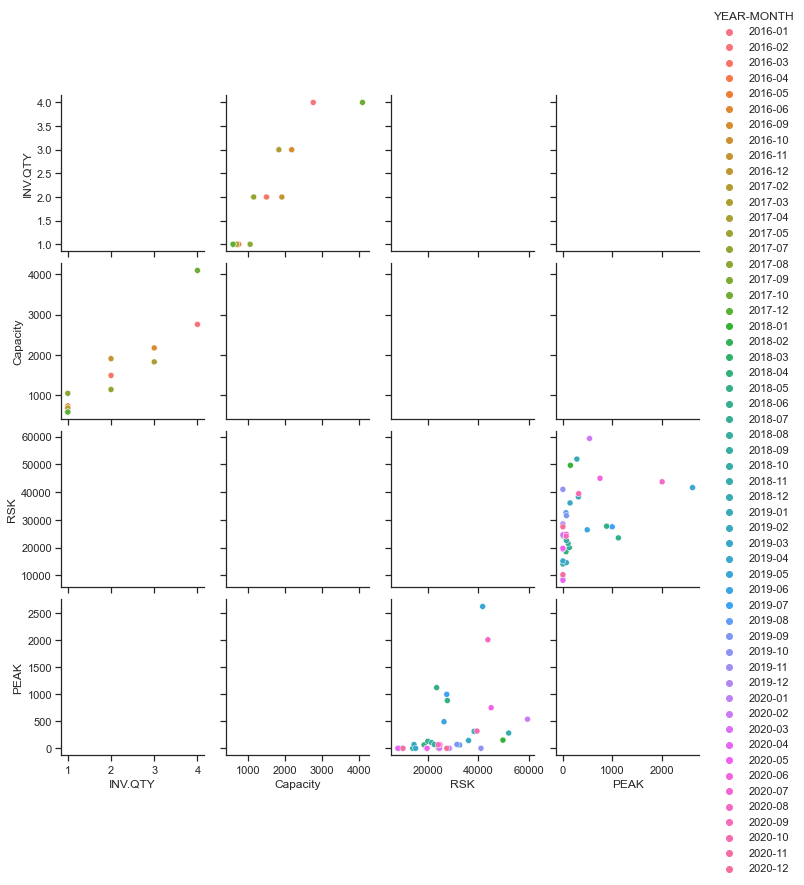

In [52]:
# Use Seaborn to try some plots for cooorelation

sns.set_theme(style="ticks")

# Getting a Userwarning here which likley due to some zeros in the peak value, not impacting o/p so suppress
warnings.filterwarnings("ignore", category=UserWarning)


DW_Plot = sns.pairplot(pd.combined, hue="YEAR-MONTH")


# Save the figures for later use:
 
plt.savefig("Fig 11. DeWatering Plot Sales vs Rain Events by Year-Month.jpg") 

# Turn back on warnings
warnings.filterwarnings("always", category=UserWarning)

In [53]:
# Found a way to display the output on the screen so just demonstrating here.  Image will open in default application. 
image = Image.open('Fig 11. DeWatering Plot Sales vs Rain Events by Year-Month.jpg')
image.show()


In [54]:
#merge the two data sets into one dataframe

pd.combinedpr = pd.merge(df_dwGerPr, df_plotpr, on='YEAR-MONTH', how='outer').reset_index().copy()
         
pd.combinedpr = pd.combinedpr.drop(columns='index').copy()

pd.combinedpr

,YEAR-MONTH,Product,INV.QTY,Capacity,RSK,PEAK
0,2016-01,Product7,1.0,684.0,NaN,NaN
1,2016-02,Product7,4.0,2761.0,NaN,NaN
2,2016-03,Product7,2.0,1492.0,NaN,NaN
3,2016-04,Product7,1.0,684.0,NaN,NaN
4,2016-05,Product7,1.0,716.0,NaN,NaN
5,2016-06,Product7,1.0,735.0,NaN,NaN
6,2016-09,Product7,3.0,2176.0,NaN,NaN
7,2016-10,Product7,1.0,684.0,NaN,NaN
8,2016-11,Product3,1.0,1225.0,NaN,NaN
9,2016-11,Product7,1.0,684.0,NaN,NaN


####  5.3.2. Look for Product corrolation across the Weather & Sales Data Analysis ####
In this section we will look for corrolation across the full data set by product type. Again it can be seen there is good corrolation between capacity and units sold [INV QTY].  As a later exercise it would be good to look at individual products only.

C:\Users\brend\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\brend\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\brend\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\brend\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\brend\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\brend\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

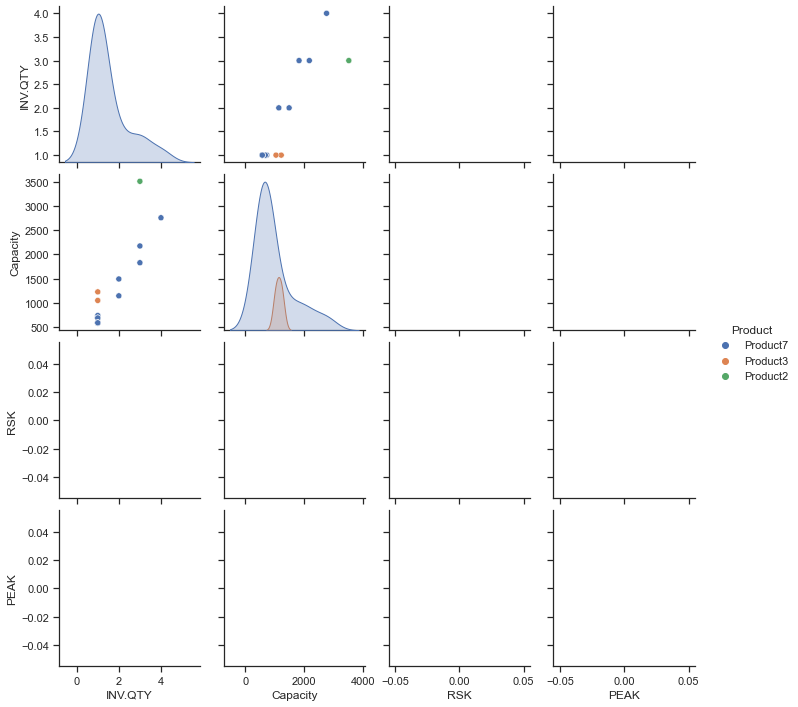

In [55]:
# Use Seaborn to try some plots for cooorelation

sns.set_theme(style="ticks")

DW_Plot = sns.pairplot(pd.combinedpr, hue="Product")


# Save the figures for later use:

plt.savefig("Fig 12. DeWatering Plot Sales vs Rain Events.jpg") 

image = Image.open('Fig 12. DeWatering Plot Sales vs Rain Events.jpg')
image.show()

In [56]:
# Add back in a month column for combined plot

pd.combinedpr['Month'] = pd.combinedpr['YEAR-MONTH'].str[-2:]
pd.combinedpr

pd.combinedpr.to_csv(r'Combined Sales Rain Summary.csv', index = None, header=True)

####  5.3.3. Look for corrolation across the Peak Weather & Sales Data Analysis ####
In this section we will look for corrolation across the full data set by month. The data is for PEAK rain events only.  This show that there may be some good corrolation between the total PEAK rainfall in the summer months and the sale of pumps in this period.  May is the peak month for rain and this is followed by a peak month of sales in June.  Given the business model is to sell to distributors this would make good sense that distributors are replinishing their stock after a heavy month of rain.

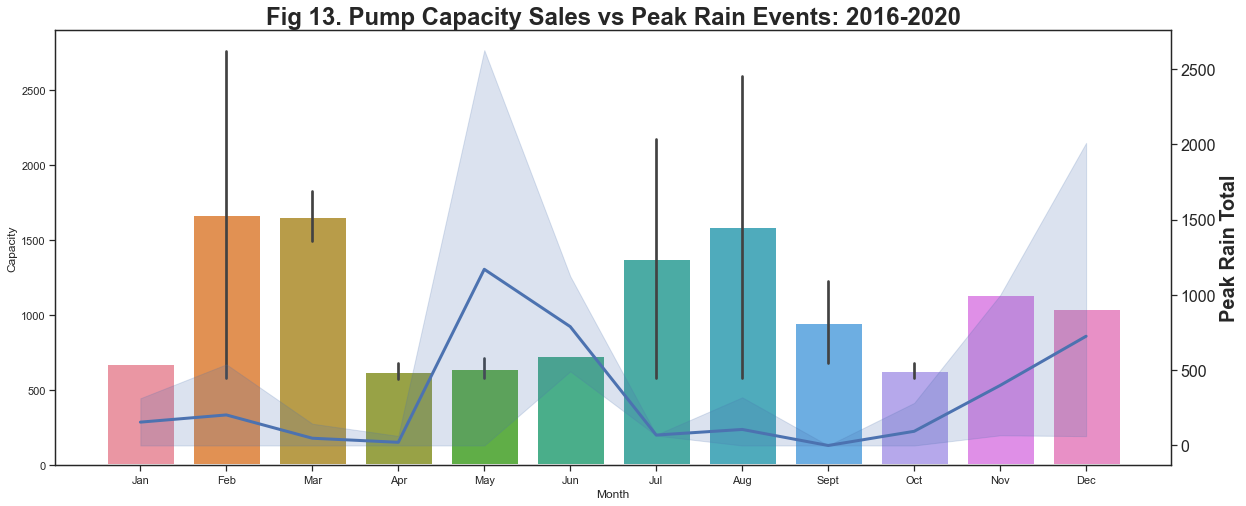

In [57]:
# Plot the number of observations to see if any trends to be observed

plt.figure(figsize=(20, 8))

sns.barplot(data=pd.combinedpr, x='Month', y='Capacity', linewidth=3)
ax2 = plt.twinx()
sns.lineplot(data=pd.combinedpr, x='Month', y='PEAK', ax=ax2, linewidth=3)

plt.title('Fig 13. Pump Capacity Sales vs Peak Rain Events: 2016-2020', fontsize=24, fontweight='bold')
plt.xticks(mm0,mmm,fontsize=30, rotation=45)
plt.yticks(fontsize=16),
plt.xlabel('Month', fontsize=30, fontweight='bold')
plt.ylabel('Peak Rain Total', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig.13 Combined.jpg', bbox_inches='tight');



<AxesSubplot:>

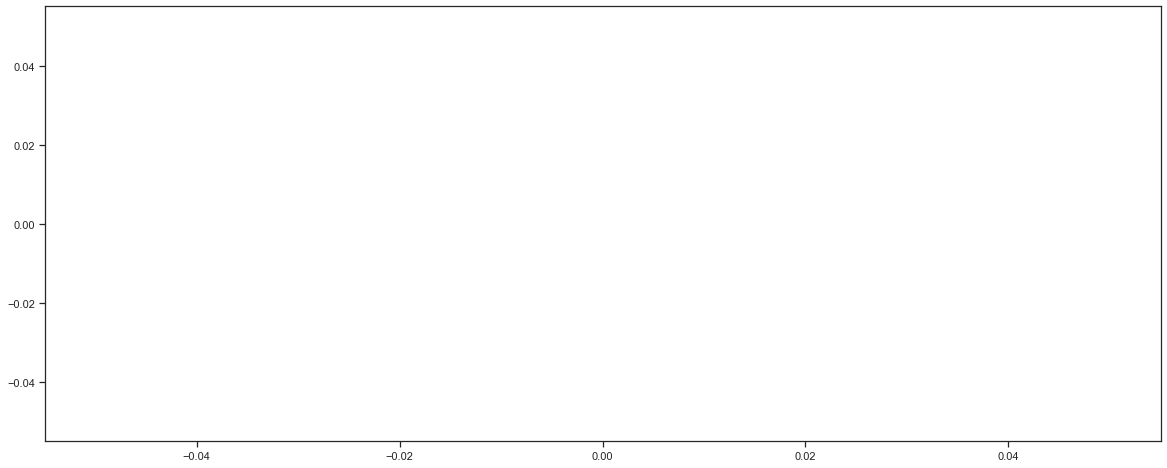

In [58]:
plt.figure(figsize=(20, 8))
sns.scatterplot(data=pd.combinedpr, x='RSK', y='INV.QTY', hue='Product', size='Capacity')

#### 5.3.4. Compare total rain & Sales Data Analysis ###
In this section we will look for corrolation across the full data set by month. The data is for total rain events only. This show that there may be some good corrolation between the total rainfall in the summer months and the sale of pumps in this period. May is the peak month for rain and this is followed by a peak month of sales in June. There is some anomolies during the winter months of Dec-Mar, although rain has a high variance March sales are relatively high vs total rain.

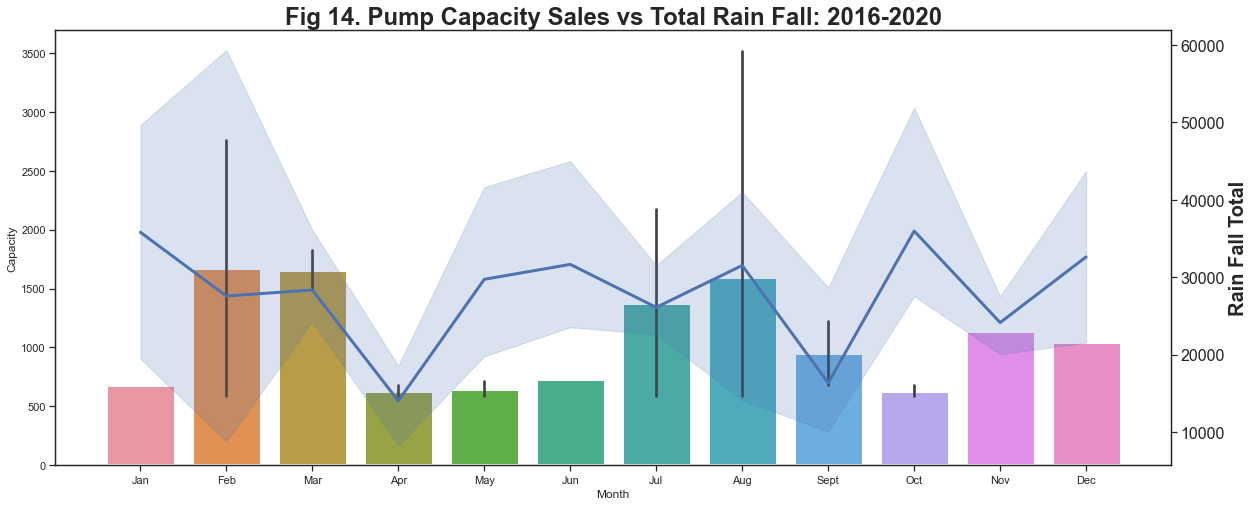

In [59]:
#Plot the number of observations to see if any trends to be observed

plt.figure(figsize=(20, 8))

sns.barplot(data=pd.combinedpr, x='Month', y='Capacity', linewidth=3)
ax2 = plt.twinx()
sns.lineplot(data=pd.combinedpr, x='Month', y='RSK', ax=ax2, linewidth=3)

plt.title('Fig 14. Pump Capacity Sales vs Total Rain Fall: 2016-2020', fontsize=24, fontweight='bold')
plt.xticks(mm0,mmm,fontsize=30, rotation=45)
plt.yticks(fontsize=16),
plt.xlabel('Month', fontsize=30, fontweight='bold')
plt.ylabel('Rain Fall Total', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 14. Combined.jpg', bbox_inches='tight');

In [60]:
# In the pump business there is an overarching trend in the 'seasonality' of the business.
# As year end [Dec] approaches most companies and distributors tend to want to minimize inventory.
# In addition the holiday period means fewer orders/deliveries in Dec and Jan.
# Then for Feb and March the trent is to 'replinish' this inventory resulting in a typicall stronger Feb & March.
# Taking this into consideration lets 'linearize' the volume over this period of Dec-March 
# We will make a seasonally adjusted dataframe 
# [note this is a big assumption and would need further validation before any business could be made on this view ].

pd.seasonadj = pd.combinedpr.copy()
pd.seasonadj

,YEAR-MONTH,Product,INV.QTY,Capacity,RSK,PEAK,Month
0,2016-01,Product7,1.0,684.0,NaN,NaN,01
1,2016-02,Product7,4.0,2761.0,NaN,NaN,02
2,2016-03,Product7,2.0,1492.0,NaN,NaN,03
3,2016-04,Product7,1.0,684.0,NaN,NaN,04
4,2016-05,Product7,1.0,716.0,NaN,NaN,05
5,2016-06,Product7,1.0,735.0,NaN,NaN,06
6,2016-09,Product7,3.0,2176.0,NaN,NaN,09
7,2016-10,Product7,1.0,684.0,NaN,NaN,10
8,2016-11,Product3,1.0,1225.0,NaN,NaN,11
9,2016-11,Product7,1.0,684.0,NaN,NaN,11


In [61]:
# As a first step lets get the mean of each month 

pd.combinedseason = pd.combinedpr.groupby(['Month'])[['Capacity']].mean().reset_index().copy()
pd.combinedseason

,Month,Capacity
0,01,684.000000
1,02,1672.500000
2,03,1660.500000
3,04,630.500000
4,05,650.000000
5,06,735.000000
6,07,1143.000000
7,08,1047.000000
8,09,1380.000000
9,10,1594.666667


In [62]:
# Now get the individual mean of the months 'Jan, Feb, March, Dec'

pd.combinedseason.iloc[[0,1,2,11]]

,Month,Capacity
0,01,684.0
1,02,1672.5
2,03,1660.5
11,12,634.0


In [63]:
# Calculate the mean of these 4 months and store the data as the season 'wintermean'

wintermean = pd.combinedseason['Capacity'].iloc[[0,1,2,11]].mean(axis=0)
wintermean

1162.75

In [64]:
# Substitie in this mean for all the winter months 

pd.combinedpr['Capacity'] = np.where(pd.combinedpr["Month"] == '01', wintermean, pd.combinedpr['Capacity'] )
pd.combinedpr['Capacity'] = np.where(pd.combinedpr["Month"] == '02', wintermean, pd.combinedpr['Capacity'] )
pd.combinedpr['Capacity'] = np.where(pd.combinedpr["Month"] == '03', wintermean, pd.combinedpr['Capacity'] )
pd.combinedpr['Capacity'] = np.where(pd.combinedpr["Month"] == '12', wintermean, pd.combinedpr['Capacity'] )

In [65]:
# Check the array has been properly updated, 
# It can be seen enven in the array summary months 1 and 12 are updated but not 11.

pd.combinedpr

,YEAR-MONTH,Product,INV.QTY,Capacity,RSK,PEAK,Month
0,2016-01,Product7,1.0,1162.75,NaN,NaN,01
1,2016-02,Product7,4.0,1162.75,NaN,NaN,02
2,2016-03,Product7,2.0,1162.75,NaN,NaN,03
3,2016-04,Product7,1.0,684.00,NaN,NaN,04
4,2016-05,Product7,1.0,716.00,NaN,NaN,05
5,2016-06,Product7,1.0,735.00,NaN,NaN,06
6,2016-09,Product7,3.0,2176.00,NaN,NaN,09
7,2016-10,Product7,1.0,684.00,NaN,NaN,10
8,2016-11,Product3,1.0,1225.00,NaN,NaN,11
9,2016-11,Product7,1.0,684.00,NaN,NaN,11


#### 5.3.5. Adjust Winter Sales for Seasonality ###
In the plot below Fig 15. it can now be clearly seen the summer peak events have a strong correlation to sales. However, given the variation in rain in Jan & Feb it is conceivable the March sales peak is influenced by this. This would need to be assessed further at the actual monthly sales level vs rainfall over the years.  With this seasonality adjustment there is now significant corrolation with the higher rainfall in the summer months and the high sales across these months.  

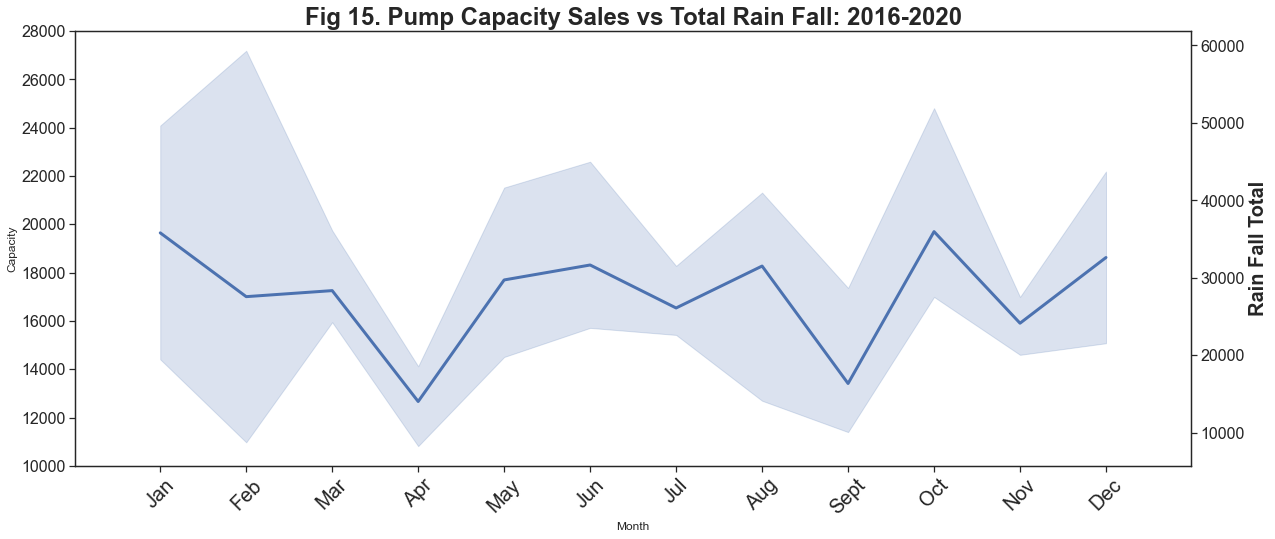

In [66]:
#Plot the number of observations to see if any trends to be observed
# In the plot it can now be clearly seen the summer peak events have a strong correlation to sales
# However, given the variation in rain in Jand & Feb it is conseibable the March sales peak is influenced by this
# This would need to be assessed further at the actual monthly sales level vs rainfall over the years.

plt.figure(figsize=(20, 8))

sns.barplot(data=pd.combinedpr, x='Month', y='Capacity', linewidth=3)
plt.ylim(10000,28000)
plt.xticks(mm0,mmm,fontsize=20, rotation=45)
plt.yticks(fontsize=16)

ax2 = plt.twinx()
sns.lineplot(data=pd.combinedpr, x='Month', y='RSK', ax=ax2, linewidth=3)

plt.title('Fig 15. Pump Capacity Sales vs Total Rain Fall: 2016-2020', fontsize=24, fontweight='bold')
plt.xticks(mm0,mmm,fontsize=30, rotation=45)
plt.yticks(fontsize=16)

plt.xlabel('Month', fontsize=30, fontweight='bold')
plt.ylabel('Rain Fall Total', fontsize=20, fontweight='bold')

# Save the figures for later use:

plt.savefig('Fig 15. Seasonal Adjusted.jpg', bbox_inches='tight');

In [67]:
# How long did it take the entire program to run

end1 = time.time()
print ('Number of Minutes to run ',int((end1-start1)/60))



Number of Minutes to run  7


## 6.0 Five Valuable insights from the visualisation  ##

1. In Section 5.1 we looked at the weather data to assess any trends on total and extreme rain events over a 50 year period.  The Global warming discussion covers a lot about rise in temperature, however, it typically does not talk much about rain.  The analysis of the rain fall over the past 50 years would indicate although no significant trend jump out, there is a decline in mean rainfall, total from extreme events and the number of extreme events. Other than 2002, which had a well know peak year of floods, it can be said that rainfall overall if anything, is in decline.


2. As we look at the seasonality of the rainfall over the year, section 5.1. demonstrates that the summer months are typically the highest period of rainfall in both total volume, number of peak events and total rainfall from peak events. A significant number of extreme events fall in the summer months May-July and this is later seen to impact sales in this period.


3. Overall sales for this business look to be very stable, section 5.2.  The apparent drop in Q1 2018 was associated with an ERP deployment. Over the 5 year period very little seasonality is apparent in sales with the exception of year end, this is related to factory and sales office closures during the Christmas holiday periods.  When looking closer by mean and span by month, the main variations that should be considered investigating further for forecasting purposes would be March and July periods. Sales in these months is typically higher. 


4. As the scope was narrowed to dewatering pumps overall and then to dewatering for Germany, section 5.2.4, some unexpected trends were identified.  In both cases March was the peak month for sales followed by higher sales and variation in the summer months.  This would not align with the typical forecasting for this product range.  Although March may be impacted by 'and overall seasonally high production month' the variation in the summer months warrants better alignment to forecast modelling.


5. Finally, as we combine both rainfall and sales, section 5.3. a number of interesting facts emerged.  Todays forecast from the sales team is typically very linear over the year with a slight increase in winter months.  As this forecast process is very new to the organization it may be based on the thought that more dewatering is needed in the winter, however, in reality this does match actual sales history.  Most interesting is the peak sales in the summer months appears to be heavily correlated to peak rainfalls in these months.  As current forecast models do not reflect this, going forward we should take this into consideration in future forecasting models. This alignment could potentially significantly help improve supply chain alignment to these peak periods thereby improving customer satisfaction. 




## 7.0 Further research proposed & comments ##

1. The data set for the purpose of this assessment was confined to Germany.  Given that rain data is available for 
many regions it would be appropriate to assess as many regions as possible vs the overall sales data.  This may result 
in further collolation or leveling of data depending on sesonality of peak rain events.

2. The analysis of dewatering products show significant coleration between years and months which would be very 
useful data for overall supply chain forecasting.  This should be completed for all product ranges to improve
forecasting abilty.

3. Other product line such as municipal water products may have corrolation to events other than rainfall.  For example 
are there any trends on capital spend in municipals that would corrolate to larger project orders.  Are there any 
more basic seasonality trends such as more installations in different seasons in nordic regionas.

4. The rain analysis here look at data from all stations.  For large regions it may make more sense to look at the
average rainfall by a region vs just averaging all stations acoss all regions.

5. Many of the Dafaframes printing, saving of files and additional figures in this project were left in for demonstratin purposes only and would not be required for a fully optimized piece of code.


## 8.0 References ##

1.  ‘The Deutscher Wetterdienst’ https://www.dwd.de/DE/Home/home_node.html

2.  An investigation of occurrence and intensity of heavy rainfall events in Germany.  GitHub - https://github.com/janikvalentin/heavy_rainfall_events

3.  Are heavy rain events increasing in frequency and intensity in Germany? https://towardsdatascience.com/are-heavy-rainfall-events-increasing-in-frequency-in-germany-2129b5d9d448 

4. Sales Data from company databases





## Appendix A - Learning from assignment ##

In additon to the areas required for assessment, additional learning in the project included:

1. How to store output as figures for use in report
2. Using the time function to test some code speed
3. Using datetime to convert formats and derive other sort columns
4. How to manage zip files both decompressing and compressing
5. How to supress and turn on warnings as needed 
6. Output a picture to the default screen application such as paint